In [8]:
# Load in the trial with 5 evaluations per evaluation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

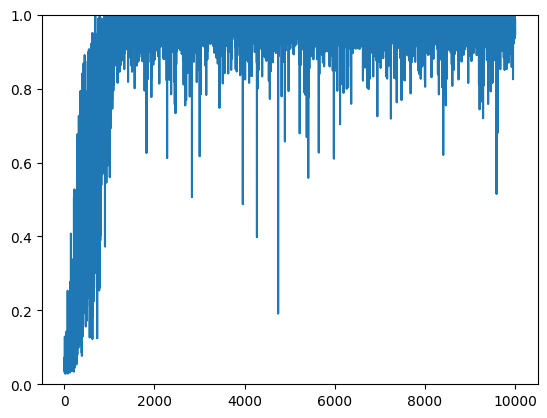

In [71]:
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/multiple_evaluations/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df[" team_fitness"])
plt.ylim([0,1])
plt.show()

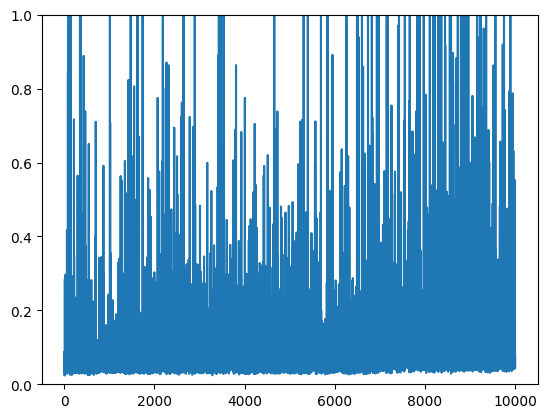

In [30]:
# Ok this is very shakey in the middle but looks quite stable near the end

# Let's compare this to the one where I just lowered the ea parameters. Ok this just made it so that ea couldn't learn
# I probably over-corrected and made the mutation parameters too small? Maybe the combination of random environments
# and low mutation parameters were enough to make this unlearnable
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/lower_ea_params/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df[" team_fitness"])
plt.ylim([0,1])
plt.show()

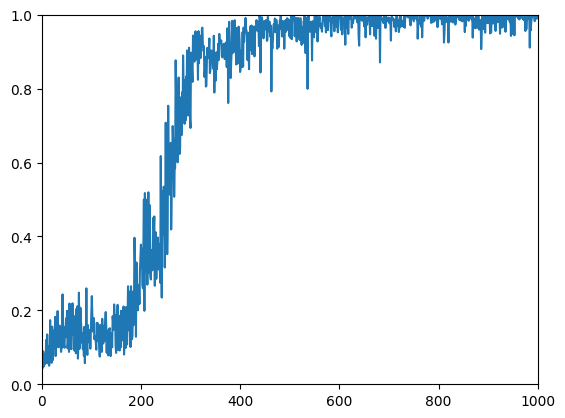

In [108]:
# Okay now let's see what happens when you do 20 evaluations
# (Running this 20 eval experiment while the 5 eval experiment keeps running. Hoping I don't have any issues from Global Interpreter Lock)
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/multiple_evaluations_20/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df[" team_fitness"])
plt.ylim([0,1])
plt.xlim([0,1000])
plt.show()

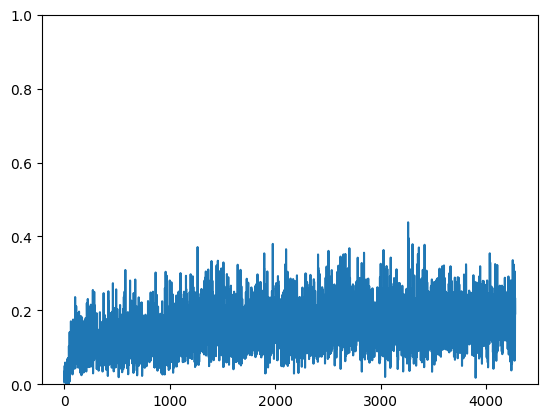

In [92]:
# What if now the rewards become sparser. Observation radius of 10
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/sparsity_10obs_rad/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df[" team_fitness"])
plt.ylim([0,1])
plt.show()

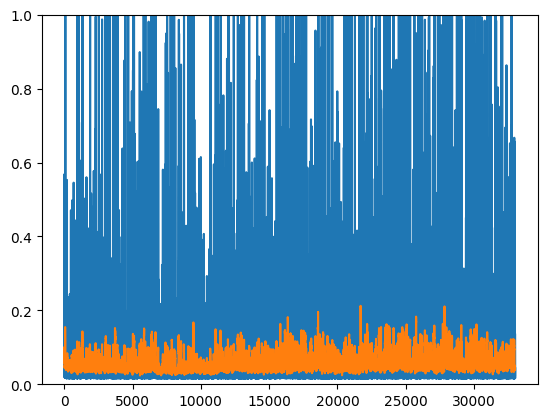

In [10]:
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/ccea_obj/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
avg_filter = np.convolve(fitness_df["team_fitness"], np.ones(20)/20, mode='valid')
plt.plot(fitness_df["team_fitness"])
plt.plot(avg_filter)
plt.ylim([0,1])
plt.show()

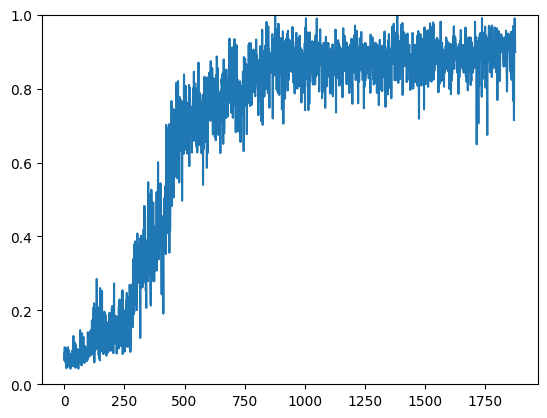

In [137]:
# Okay so this should give a similar result to when I was doing 20 evaluations per team with the code that doesn't have the CCEA
# as a big class
# This is the result using runCCEA from ccea_lib.py
# It looks worse than when I was using ccea_toolbox.py. Not sure if I messed something up when
# putting everything together in the class
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/should_be_same_as_multiple_evaluations_20/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df["team_fitness_aggregated"])
plt.ylim([0,1])
# plt.xlim([0,1000])
plt.show()

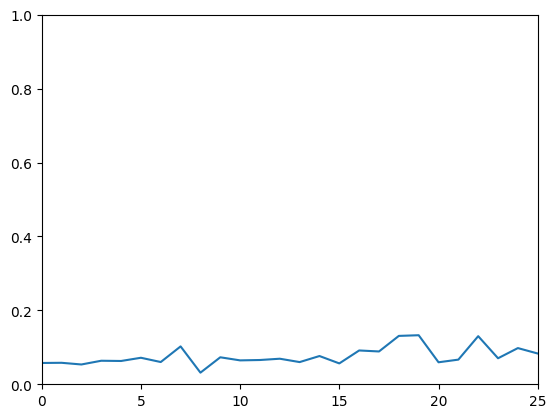

In [152]:
# Now I'm switching back to using ccea_toolbox.py's runCCEA() function
# Hopefully I see something more similar to the multiple_evaluations_20/trial_0
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/multiple_evaluations_20_a/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df[" team_fitness"])
plt.ylim([0,1])
# plt.xlim([0,1000])
plt.show()

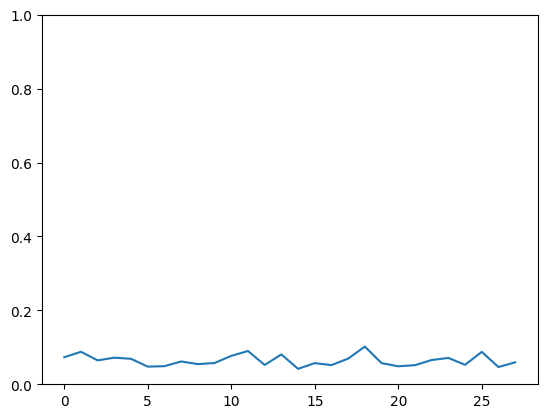

In [151]:
# I seem to have finally fixed ccea_lib.py
# Let's give it another shot
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/multiple_evaluations_20_b/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df["team_fitness_aggregated"])
plt.ylim([0,1])
# plt.xlim([0,1000])
plt.show()

In [141]:
first_str = "[[[0.14954326934655837, 0.1822205108624862, -0.1544177246566859, 0.43254372228217763, 0.1495941687158374, 0.167769299666368, -0.08026251986048, -0.38146710859456534, -0.3419464009713108, 0.0019283815851260933, 0.4004047796886335, -0.4031050390728461, 0.0033750386127312793, -0.02569404170121803, 0.10504775226460383, -0.04380530988811244, -0.2821536862304901, -0.1445330525207673, 0.468813388664999, -0.31149836910949924, 0.36229650347041376, 0.031245105163038134, -0.4440756098905189, 0.311221242183946, -0.482712785503672, 0.38758548602970583, -0.16150229547989436, 0.37142760894785415, 0.22699423914681638, -0.14157465603608188, 0.12533098068928372, 0.3998531372127109, -0.3289056642438598, -0.29443106705467526, -0.21079842776645907, 0.3206624180193546, -0.2530697963669859, -0.2536157936876342, 0.11470324207121418, 0.13847354971663392, -0.0442333263976414, 0.051114564842932086, -0.46890419628211255, -0.34834049330432926, -0.5321307091496041, -0.4449988999538911, 0.2707236391862504, 0.4155467210806541, -0.2752778370877635, -0.11472873339497347, -0.48537165923372094, 0.013988041761389958, 0.1592360228290182, 0.12413440958968203, 0.4015557620509973, 0.051691488694551646, -0.447229812273777, -0.12367308454081938, -0.03284210586042955, -0.16418516497502944, -0.38131452035912183, 0.1274685223388181, -0.011173457260396646, -0.03859789218065102, -0.06616267038568334, -0.5152218588065096, -0.23468643983313797, -0.22391489449712185, -0.03925828625780736, -0.3463948720840425, -0.42142372645685944, 0.06618558807729641, -0.35921244496924, -0.395472991935364, -0.37961526000675716, 0.205394943194934, 0.3659832799455516, 0.30976086857547735, 0.07579279884445045, 0.13520711610569713, 0.3241907170192769, -0.06725136876042567, 0.18567481102789252, 0.05306425277576071, 0.13388616633869532, 0.12508190084089324, -0.04062142140158803, 0.03557600836925634, -0.3789175462095626, -0.19420066579881534, 0.1912992137814441, -0.08109114951707364, 0.35842815806658246, -0.10337670311974265, 0.16935376606857333, -0.38443293066458906, -0.200461659847471, 0.44309562108859935, -0.24669249377384006, 0.1259133230205275, -0.4685761348207297, 0.008035063620738706, -0.0485774676773969, 0.5345668557689167, 0.3254559249996858, 0.35027753910185, -0.05695498949776995, 0.2111745075403696, -0.3176780507540416, 0.06593993516811808, -0.11062922204692371, -0.030340390637891512, -0.43913506338084396, -0.2867346698539436, 0.09382583820921565, 0.15362051100180074, 0.23792821286211877, 0.5870370650935018, 0.05644926711644127, -0.2824710032130835, 0.13413844397775151, -0.18342311875073725, 0.3137308248452343, -0.37009976763115937, -0.26315537799008226, 0.1737363437900138, 0.45300553816058875, 0.08946007566421676, -0.11987371288299298, 0.2762920626979588, 0.2574992728935084, 0.40639458354419056, 0.2775793669095388, -0.44725624833793914, 0.5463053040148069, 0.4241653025686464, -0.1768707643747719, 0.10555966431530639, 0.3342924830775176, 0.38905377992246537, 0.23832054287423782, -0.2912999484611919, -0.4143607877947749, -0.13371933394428637, -0.04400507041998536, -0.12299300798069714, 0.24948784803333102, 0.26369321815837554, -0.10030390662425637, 0.18984283574549368, -0.3074706071553176, 0.4513923730377122], [0.14954326934655837, 0.39145641102694306, -0.1544177246566859, 0.4072154575721394, 0.11974233742948082, 0.10782878283065267, 0.032526875217428364, -0.4877796496068092, -0.3419464009713108, 0.17706723054061213, 0.19340899012171564, -0.4031050390728461, 0.13699102969482446, -0.02569404170121803, 0.07696220953690613, -0.10086930108981762, -0.2821536862304901, -0.1445330525207673, 0.468813388664999, -0.31149836910949924, 0.36229650347041376, 0.031245105163038134, -0.42513362020101675, 0.311221242183946, -0.482712785503672, 0.3372092651616604, -0.16150229547989436, 0.41861903055151417, 0.22699423914681638, -0.14157465603608188, 0.12533098068928372, 0.48672501584322336, -0.3289056642438598, -0.29443106705467526, -0.21079842776645907, 0.3206624180193546, -0.2530697963669859, -0.2536157936876342, 0.11470324207121418, 0.08457557555695183, -0.08126089070925491, 0.051114564842932086, -0.46890419628211255, -0.4945382541180724, -0.4723304149615024, -0.4449988999538911, 0.2707236391862504, 0.47914847119049153, -0.3753615193579064, -0.11472873339497347, -0.48537165923372094, -0.06602025972092185, 0.16166962074375757, 0.12413440958968203, 0.4015557620509973, 0.051691488694551646, -0.447229812273777, -0.12367308454081938, -0.04089539903945405, -0.16418516497502944, -0.4654759138909301, 0.1274685223388181, -0.011173457260396646, 0.20934133762844098, -0.13541569064584247, -0.4294437606704006, -0.23468643983313797, -0.3239258520965165, -0.03925828625780736, -0.3463948720840425, -0.42142372645685944, 0.024899030539944578, -0.35921244496924, -0.395472991935364, -0.37961526000675716, 0.205394943194934, 0.306655387093411, 0.30976086857547735, 0.07579279884445045, 0.13520711610569713, 0.2536886969020419, -0.07234720978457043, 0.009759188785669504, 0.2130455453644915, 0.13388616633869532, 0.10881836757311447, 0.14630960085211941, 0.03557600836925634, -0.2860814471048784, -0.19420066579881534, 0.1912992137814441, -0.08109114951707364, 0.35842815806658246, -0.12587804707736572, 0.16935376606857333, -0.38443293066458906, -0.200461659847471, 0.35108804303179564, -0.32445695322617973, 0.1259133230205275, -0.47222133425771373, 0.10928645844762808, -0.0485774676773969, 0.39939902499704716, 0.3254559249996858, 0.27320331468467984, -0.1613068468372122, 0.16904401383792622, -0.3452314507727293, -0.010226342153179635, -0.11062922204692371, -0.030340390637891512, -0.2259079293773505, -0.2882803492647804, 0.019851001750208597, 0.15362051100180074, 0.06276751882586795, 0.45303078632538907, 0.05644926711644127, -0.35075236938114074, 0.14161518925942096, -0.18342311875073725, 0.4385385760468693, -0.37009976763115937, -0.04234315415238166, 0.1737363437900138, 0.4694980869283334, 0.021900900068979157, -0.11987371288299298, 0.2762920626979588, 0.28696021498219393, 0.4136729664942378, 0.2214362996512742, -0.37239763115932056, 0.49144440896667974, 0.4306820434785784, -0.06473301186071645, 0.1592975368913645, 0.3342924830775176, 0.4168838982430365, 0.22303342771803147, -0.4094065345605987, -0.4321714866212879, -0.13371933394428637, -0.04400507041998536, -0.1886696355220594, 0.24948784803333102, 0.26369321815837554, -0.10030390662425637, 0.19803959533866178, -0.3074706071553176, 0.4513923730377122], [-0.08505827749367195, 0.2437024470523893, 0.2958776426338333, -0.06759861985311569, -0.07651320511384085, 0.16407332378212203, 0.12180609195509799, -0.3309662955952516, -0.27529401651322416, 0.2608507638809022, 0.12712889170458586, -0.3050579605681785, 0.10977299070703384, 0.4685702338382456, 0.37133744964088866, 0.13836875973889506, -0.5420377426624813, -0.04097101614740842, -0.41097771507585934, -0.3100611295944078, -0.07761195395325901, -0.04312623721233644, 0.29259160083777, 0.12884153984074387, -0.21751539806514286, 0.19506906192005746, -0.019756224709541883, 0.007529615670713086, -0.33736323961589176, -0.058354313377299016, -0.15847412981853481, 0.226546393909013, -0.06773203945307962, -0.11954268751745283, -0.022991906201931367, -0.020088627308983864, 0.18963870063280375, 0.21984768932326348, 0.3010969737326715, 0.018291996620350262, 0.2925442500879945, 0.4647259459117272, 0.45158680699253567, 0.05877893571638171, -0.4345113516186617, 0.34728652785382463, 0.33645697166155164, -0.4836821810024048, -0.17233427128600365, -0.17790277992286663, 0.231136227346198, 0.11030628810810061, -0.15584620331551963, -0.3155083247927858, -0.3434409506274515, -0.4045467707804846, 0.29057273877510303, 0.43573574761538925, -0.28012366168179326, 0.28692146256624984, 0.45114372239750167, -0.3082727747445594, 0.2051366587353095, -0.06068731907818581, 0.5510437118120453, 0.36959191108820555, -0.48395188605428463, -0.2986727257121774, 0.34798407471206727, 0.1372970861332527, 0.02281931737540177, 0.3098135781591498, 0.41236141033166723, 0.4702437080475149, -0.04826425420844685, -0.4523459698436104, 0.19843147421754403, -0.44986195090002745, -0.0767376821900618, 0.3597363526759456, -0.10297176000057784, 0.08586973888134655, -0.3285698386079494, -0.34226429374951917, 0.10605507187040386, 0.3644831653341858, 0.5971724533964844, -0.46886126903510383, 0.4209823275856519, 0.011118254106266545, -0.1506443315132926, -0.10258533478347143, 0.07788945645770196, -0.05876879163795397, -0.38494323792273766, 0.3344546512920758, 0.20648943983620593, 0.05000413307383419, 0.11187285943053488, 0.4860259041500742, -0.32490709905486115, 0.4546360544932506, 0.15875591552880827, -0.15665217522048902, 0.05877659106862054, -0.041604895977381706, -0.3056637414020874, -0.06710242747400519, -0.4390667166617205, 0.43220312044143006, -0.3794852882490439, 0.24729047516921504, 0.0700125055668297, 0.4746576540880918, 0.33527685558397674, -0.22494873151309952, -0.06628003177855049, -0.4501018777086956, -0.44816227133949815, -0.2415706493967355, 0.36943438807513757, -0.5570981298385579, -0.21879923356069014, 0.136186112199416, -0.17074027104732384, -0.40022805546321566, 0.44738484807543955, -0.45723065439009514, 0.0980596301214961, -0.07123107405199702, -0.1546621117030057, -0.3050690182174324, -0.29804158402072184, -0.13117195888859826, 0.25234582247811, -0.04494701949185037, 0.2773161331433892, 0.15810190527561754, -0.3268937629955837, 0.29202209185737626, 0.0814035960002586, -0.2550462559836111, -0.043158713427971375, 0.5311013070113937, -0.10803467058197602, -0.40570691677476955, 0.45973870764051705, -0.3816213813793119, -0.37618326874116503, 0.21914395794838068, -0.11442612112752994, -0.21003409822593355], [0.14954326934655837, 0.39145641102694306, -0.1544177246566859, 0.6575382925435258, 0.0324870297637742, 0.16580570369414732, 0.032526875217428364, -0.417847556903226, -0.1862180821451155, 0.17706723054061213, 0.24074380411297974, -0.4031050390728461, 0.28910746784250185, -0.02569404170121803, 0.07696220953690613, -0.10086930108981762, -0.23371029716758834, -0.1445330525207673, 0.468813388664999, -0.31149836910949924, 0.36229650347041376, 0.031245105163038134, -0.36074604012006045, 0.2546702185732249, -0.482712785503672, 0.24273694135778218, -0.16150229547989436, 0.41861903055151417, 0.22699423914681638, -0.14157465603608188, 0.12533098068928372, 0.48672501584322336, -0.3289056642438598, -0.2640927830109992, -0.21079842776645907, 0.3208726371489168, -0.23943492054571042, -0.2536157936876342, 0.11470324207121418, 0.08457557555695183, -0.08126089070925491, 0.051114564842932086, -0.37052050302703754, -0.5510493255956459, -0.4475350837746773, -0.4449988999538911, 0.2707236391862504, 0.47914847119049153, -0.25254773583865564, -0.012808104757955296, -0.48537165923372094, 0.011084073091183935, 0.19803662502777217, 0.0013043810861615712, 0.30871873618652595, 0.051691488694551646, -0.4580459184220142, -0.37289008857619776, -0.08450383996728032, -0.16418516497502944, -0.4654759138909301, -0.12174856483429974, -0.07731658190547755, 0.20934133762844098, -0.13541569064584247, -0.4294437606704006, -0.03485683481745741, -0.3239258520965165, 0.007641218363269371, -0.3199411484305669, -0.5687554330267602, 0.024899030539944578, -0.4003085329803231, -0.6059423856805256, -0.37961526000675716, 0.12509533510085868, 0.306655387093411, 0.30976086857547735, 0.07579279884445045, 0.13520711610569713, 0.2536886969020419, -0.08208688171208166, 0.009759188785669504, 0.2130455453644915, 0.1673098973541389, 0.10881836757311447, 0.2090000401766175, 0.03557600836925634, -0.2860814471048784, -0.10282615099675348, 0.1912992137814441, -0.047277265580309716, 0.35842815806658246, -0.2093195453092861, 0.16935376606857333, -0.5157316594384964, -0.30933970896547547, 0.34613803486226674, -0.24964573475694857, 0.3479608428932608, -0.3901418513835378, 0.17323309563563827, -0.0485774676773969, 0.39939902499704716, 0.3254559249996858, 0.2547138779767254, 0.1196855402419642, 0.16904401383792622, -0.3452314507727293, -0.03359803224384218, -0.1575467257511633, -0.030340390637891512, -0.3374193504631116, -0.21259087319318065, -0.059519823837638666, 0.0953643591580238, 0.06080154608905835, 0.3607478532906424, 0.05644926711644127, -0.35075236938114074, 0.17171034130965676, -0.18342311875073725, 0.5255765843603826, -0.37009976763115937, -0.04234315415238166, 0.1737363437900138, 0.4694980869283334, 0.021900900068979157, -0.17999922250845612, 0.2925750183125438, 0.3795790893488883, 0.41388298075699115, 0.2214362996512742, -0.5270987795856452, 0.49144440896667974, 0.4306820434785784, 0.001904379011380658, 0.1592975368913645, 0.3342924830775176, 0.4786649258519083, 0.22303342771803147, -0.3581458528934804, -0.4321714866212879, -0.10979010705090572, 0.1287175247434305, -0.13152668553338556, 0.24948784803333102, 0.26369321815837554, -0.10030390662425637, 0.05385230709506836, -0.04125188993930473, 0.42401262733070877], [0.08235075353539752, 0.2437024470523893, 0.19523679336411603, -0.06767146917300089, -0.07651320511384085, 0.18207518526234015, 0.05551987296720329, -0.23411017211131302, -0.1356744534080665, 0.12726676302227824, 0.17906334358481354, -0.2904062388548393, 0.10977299070703384, 0.24820741631734553, 0.37133744964088866, 0.15226330756947948, -0.4041731264281525, -0.07648191007137795, -0.3480772292616665, -0.3999684932056878, -0.36695056792611513, -0.10936255127256443, 0.2562289283010825, 0.12884153984074387, -0.21751539806514286, 0.1029024659654101, 0.09713792024866025, 0.0022529422743711525, -0.18279588703136274, -0.11417112327999981, -0.15847412981853481, 0.16534836378298218, 0.1095360272353536, -0.07502963907821483, -0.039187281574068845, -0.12293708546081139, 0.18963870063280375, 0.21984768932326348, 0.3010969737326715, -0.09474311835410076, 0.32411187026905625, 0.4647259459117272, 0.4923494116644874, 0.22065560195027856, -0.42809709409103186, 0.41153042976231713, 0.33645697166155164, -0.4836821810024048, -0.1095587497964381, -0.04431534981616295, 0.552651448389915, 0.3173756747722766, -0.2176779537965301, -0.19077427236693828, -0.33146960804072667, -0.527692507923782, 0.3026432568382446, 0.39312324788263614, -0.3639150061944256, 0.24491269196487397, 0.5222628764704111, -0.4760694495363507, 0.07189445185571919, -0.1278511059660739, 0.45909999785518674, 0.3711783527160208, -0.40806797543528284, -0.20390538469265757, 0.34798407471206727, 0.07424107336093255, 0.02281931737540177, 0.3098135781591498, 0.2640417052117675, 0.4685052077041453, -0.20454674039892617, -0.47769738821303154, 0.19228278531325904, -0.4033007434478881, -0.09208947158689496, 0.3597363526759456, -0.10297176000057784, 0.10115883974997686, -0.3285698386079494, -0.34226429374951917, 0.023422121029694667, 0.35247109788307635, 0.49983796599714014, -0.46886126903510383, 0.25388549382371395, 0.011118254106266545, -0.1506443315132926, -0.10996276987748757, 0.07788945645770196, -0.1523031140889456, -0.3544910257758601, 0.32263824648998435, 0.20648943983620593, -0.01665482115973002, 0.11507388851875638, 0.4860259041500742, -0.4353845592725121, 0.29612236466376624, 0.3817575126899301, -0.15665217522048902, -0.09679732505032826, -0.0673322291957697, -0.3056637414020874, -0.09272877158149864, -0.3474411290783903, 0.39594019108478123, -0.2897666499671583, 0.09713189560106439, 0.0700125055668297, 0.41011310181349203, 0.134738558448374, -0.13980913490714963, -0.12388376176166405, -0.37900177102113913, -0.4793626218584798, -0.1890265572343256, 0.44983074235408593, -0.4504579560458808, -0.32325676009325277, 0.16773196395801204, -0.2194152937255351, -0.35015967861430225, 0.44738484807543955, -0.4591532266571923, 0.0980596301214961, -0.07123107405199702, -0.1546621117030057, -0.4237759755382872, -0.3371906118960861, -0.15852966707707133, 0.3095804561403674, -0.0317733068682613, 0.2773161331433892, 0.39468253121448565, -0.3268937629955837, 0.37463965300361884, 0.04019046411485024, -0.07936226462472018, 0.20528043080998085, 0.38996679855026894, 0.04064202052615215, -0.40570691677476955, 0.45973870764051705, -0.3816213813793119, -0.24469860078835717, 0.2216934981852633, -0.16879966293397747, -0.21003409822593355]], [[0.27184343456555415, 0.037509666483207194, 0.10884547510306408, 0.11049365119321308, 0.2758065772107615, 0.2127390948783744, 0.2853742617981513, 0.016555435818856434, -0.03154555527905378, -0.3588303945363883, 0.1715445851193338, 0.14189754480023542, 0.2709666027174191, 0.14712624433714694, -0.004565409567533596, -0.44219501932810257, 0.1494886560415266, 0.17528544493954812, -0.3656704976374163, -0.26445311995261356, -0.03638704836420903, -0.38286496099948986, 0.4942381538009021, -0.4263956038901118, 0.19984272693447913, 0.37243559097829704, -0.4392964385381988, -0.020904028158156174, -0.058772369642542066, 0.47690712358610554, 0.46116804032774283, 0.08360494829786325, 0.2498742547947559, 0.3671061975707721, -0.3930275127249715, -0.38894429838990086, 0.14039050471957693, 0.40709768885531517, 0.21001624805361985, 0.412914606727942, -0.3352075924704907, -0.2250978401554189, -0.31097089125930344, 0.039801569348649646, 0.4564434918440554, -0.2997855280825029, -0.05398392066085467, -0.032739649842065566, 0.04641164646586626, -0.20034610735259084, -0.053573267409268155, -0.4994500477282684, -0.49708591206712394, 0.02618254166280043, -0.3951687815606383, 0.10990997707571626, -0.08919261171671122, -0.06872348429797093, -0.20254062740905787, 0.3627550137910506, -0.15599035366710412, 0.36479909057046356, -0.43393129575343314, 0.13284229687207783, -0.3150310647442268, 0.4249302065327518, -0.4558665726880391, 0.33245714198224907, 0.2668519424836473, -0.10165357203024128, -0.4358142634693071, 0.20721910344632533, 0.22504088247372733, 0.29136541285164097, 0.1788588713272703, 0.32128146075160613, -0.10237766616831967, 0.14807055152295423, 0.40330958923449745, -0.20807784152345432, -0.27312781774933315, -0.1967008393846451, -0.4821365758350048, 0.3414942616655816, -0.32524794943676183, -0.4914539223845167, -0.23783785652126987, -0.030014052153336745, 0.40249639719264085, -0.14901573254835576, 0.3650274188234053, 0.4305158479108404, 0.48800964714998085, 0.0857522410812257, 0.15678241823160866, 0.052346137952831606, 0.28856692763510894, 0.18749162795997143, -0.39636679443098166, -0.08987316917986454, 0.35347047272045484, -0.07874034649703843, 0.2885646798285315, 0.3445913864918744, 0.2724500302043694, 0.22725256798502247, -0.1669442429955753, 0.0023278415273660924, 0.3369178258221227, -0.06482658876698444, 0.07450686031446752, -0.4503051668149939, -0.06254301131008877, -4.9691114374139644e-05, -0.34201602714524737, -0.11306058764332239, -0.4233935083198287, 0.46818085845089763, -0.3599676437705207, 0.21825368454571203, -0.23295420892041907, 0.4807349615115626, 0.3609384268929652, 0.032099081547747654, -0.25689609595875085, -0.4048792017111116, -0.07346801544998349, -0.16488579098551204, -0.2863799156198876, 0.42557184448067875, 0.11625397528109505, -0.3826225614520523, -0.035523224712500245, -0.1731913362752645, 0.2923586230194708, 0.07373299479991813, -0.48284836125076536, 0.03119962431907597, -0.019659432467259874, -0.23912255532361104, -0.06357316870264118, -0.23933525272638823, -0.36747433698117016, -0.20305818344621995, 0.4937659709668587, -0.4392394881991445, 0.07159208034255127, 0.31919065736378216, 0.36475321331864863, -0.039150017919379776, 0.21180954853603817, -0.02526944864321712], [0.32535981993691854, 0.023332956435098307, -0.10236349479515747, 0.11049365119321308, 0.3377852284510823, 0.2127390948783744, 0.2853742617981513, 0.016555435818856434, -0.03154555527905378, -0.3588303945363883, 0.22186151144604616, 0.14189754480023542, 0.2709666027174191, 0.2481401632277302, -0.004565409567533596, -0.4440569282080042, -0.04262589367599204, 0.17528544493954812, -0.3656704976374163, -0.26445311995261356, -0.04792453092613996, -0.38286496099948986, 0.7037857282614823, -0.46311873887263943, 0.19984272693447913, 0.37243559097829704, -0.5225038190194248, -0.020904028158156174, -0.058772369642542066, 0.40327117539477886, 0.35964490349844624, 0.08360494829786325, 0.3655098815144916, 0.39336458262661717, -0.3930275127249715, -0.38894429838990086, 0.14039050471957693, 0.4689961281314533, 0.21001624805361985, 0.35340431101261083, -0.3352075924704907, -0.2250978401554189, -0.31097089125930344, 0.039801569348649646, 0.4564434918440554, -0.14586185794643114, -0.05398392066085467, -0.032739649842065566, 0.04641164646586626, -0.20034610735259084, -0.159885929013672, -0.4969585793710479, -0.49708591206712394, 0.08522445489565666, -0.16723989547523282, 0.19904814547330463, -0.08919261171671122, -0.0006799742230779865, -0.33335127565066086, 0.1756222513607707, -0.14925206874390706, 0.2402743815836088, -0.43393129575343314, -0.013080234712363997, -0.3150310647442268, 0.4602348390193333, -0.4298235380352931, 0.33245714198224907, 0.2668519424836473, -0.2926475805887653, -0.5284706951924274, 0.20721910344632533, 0.11540377841300792, 0.2578038697301491, 0.1788588713272703, 0.32128146075160613, -0.10237766616831967, 0.005355084338120708, 0.40330958923449745, -0.20807784152345432, -0.0386096158361888, -0.25972742239367735, -0.4821365758350048, 0.3414942616655816, -0.34107281302898684, -0.4914539223845167, -0.2718147803234042, 0.07917456695486663, 0.40249639719264085, -0.0159394914796481, 0.2803432901552837, 0.4305158479108404, 0.4849933156298758, 0.0857522410812257, 0.15678241823160866, 0.052346137952831606, 0.28856692763510894, 0.18749162795997143, -0.43758192832854825, -0.1669240170067206, 0.2498285979363057, -0.07874034649703843, 0.16637300084588647, 0.26918540828522364, 0.28433478884419106, 0.22725256798502247, -0.1669442429955753, -0.04631892619144424, 0.27062614635463234, -0.14801014282836245, 0.03667474764058249, -0.4503051668149939, -0.06254301131008877, -4.9691114374139644e-05, -0.34201602714524737, -0.11986283410798494, -0.4233935083198287, 0.46818085845089763, -0.30089001096763723, 0.21825368454571203, -0.23295420892041907, 0.41997973924297943, 0.3609384268929652, 0.032099081547747654, -0.25689609595875085, -0.4048792017111116, -0.07346801544998349, -0.20990188949499503, -0.31159196184472426, 0.34178774267800194, 0.07869795383530984, -0.3826225614520523, -0.1902449973363545, -0.17885358000695414, 0.3175154527290068, 0.07373299479991813, -0.48284836125076536, 0.14484259714638392, -0.019659432467259874, -0.36794853913017544, -0.06357316870264118, -0.34795256005221936, -0.36747433698117016, -0.28125123781751465, 0.48878523314683864, -0.4392394881991445, 0.1422252396971042, 0.31919065736378216, 0.36475321331864863, -0.039916462338238694, 0.23005461851070985, -0.02526944864321712], [0.11365443437913782, 0.10802051647697386, 0.0942810142462995, 0.38313917578248147, -0.09373338018886991, 0.1584395521477845, -0.012335051849915395, 0.32137937747025636, -0.07299193079373067, 0.4189320165511732, 0.34742639450446444, 0.18374249454634545, 0.4304146055862046, 0.16292955821973099, -0.1439598868433431, 0.4592969282764884, 0.06690055972677797, -0.15323702278771012, 0.12707059692362732, 0.00037488260637352777, 0.4964316210448537, -0.08562924194572752, 0.4328752837784532, -0.04933262509979308, -0.27462548477440274, 0.03562296427800482, 0.13983503142619147, -0.15887697780951332, 0.08694586668003057, -0.08156463913250958, -0.47864083340461494, -0.4789129120825797, -0.16152238139436653, 0.0845410822790299, -0.37156561650681996, 0.46256186130905774, -0.0940640335165035, -0.3922004053587801, -0.08085155608834554, 0.420550992041559, 0.3451601535041988, 0.16208597217970833, -0.38105000489170004, 0.07975742593719984, -0.33043017844168954, -0.4366230651183217, -0.348081156991861, 0.04674784964632929, 0.23118985690336907, -0.23866999810770073, 0.4959853814321872, 0.04233749286854971, 0.2533993100885129, -0.3032978060117558, 0.2609862254177306, 0.13077592740060506, -0.42194200430054973, 0.11891283679390152, 0.26414050883360785, -0.2929953244243022, -0.23439122766919662, -0.4979392085309106, 0.10272956723993865, -0.20092492018566288, -0.26634955226868173, -0.18051445247746306, -0.37149925915565274, 0.15969726280994423, -0.17591990712095085, -0.09649818365452295, -0.0450578224545711, -0.13542458568159724, -0.10755255935359939, -0.12183462916378249, 0.2530850646241103, 0.3957039947869322, 0.058968053982277856, 0.4717747916325818, 0.26846777196981486, -0.21413529914323237, 0.3692405370524049, 0.06938734380338996, 0.13538604610059202, 0.053090441262504506, 0.4152166037723413, 0.1037013542280003, 0.18163773766420516, -0.24069220535613445, -0.340115238774798, 0.11866558422357369, 0.3170995696099652, -0.35563856722642107, 0.22525521534627113, -0.16255970473442766, -0.28635052569285535, 0.3098011224840044, -0.3663410010949844, -0.08033516706004074, 0.14287787329027957, 0.20246249460982113, 0.26594783904923136, -0.40053761069584903, -0.36899708640492124, -0.1659226947087551, 0.2828101512649854, 0.3954530953005463, -0.07780961458593205, -0.290576910589855, 0.2602149963037945, -0.07025464756781563, -0.30249042462747333, -0.11714601028581192, 0.41429082731936123, 0.16604629784155744, 0.2246265575819668, -0.4287540463158026, 0.11332167792600512, 0.44083535379519323, -0.0986055994797006, -0.1321121852023955, -0.24981668201495222, -0.0007995258681087053, -0.11396331933490074, 0.3431847985790158, 0.17630690903090962, 0.045001723910205293, 0.2613505838551574, -0.2920899883316407, -0.08047329180788351, -0.020381094344198034, 0.02360956187931318, -0.04984456898521118, 0.48713784228827217, -0.07902291253766103, 0.34855187357451667, 0.25928370944654994, -0.18303588377348934, -0.02402926303903799, -0.6277622744831883, 0.13324894016026573, -0.14618428224888685, -0.26958150769919037, 0.5818174451987483, -0.05134622190581861, -0.2669537541571404, -0.024413819667788328, -0.4384197722326669, -0.1034837404586812, 0.14560181430308194, 0.15615452788176298, -0.3947543535970155, 0.23607796912263002], [0.39031351937752623, -0.0462632928892871, -0.12007942417537365, 0.04255356248404258, -0.437195856750347, -0.01107267341267415, -0.2641208264740018, -0.34331443500252945, -0.4423557695955517, 0.3932670664673267, -0.24488054437644188, 0.17496059613025428, -0.04989664643567446, 0.17571110691972913, 0.32659953692761, -0.2493672423991244, -0.04799861232119185, -0.053592060458116264, 0.2957279436262953, 0.4168248403705441, -0.15973242046294706, -0.49734395369046597, -0.4300084203454354, 0.1568831202800619, 0.26993265414402795, -0.47528555688648966, 0.5586247571336891, 0.04730560692399399, -0.31485193676155243, -0.31383932710073265, -0.11713423942075307, -0.3330907688642477, 0.4422972519505345, -0.44262420083828097, 0.19308074801212527, -0.12809882837636333, 0.39908126455877674, -0.017119273356128173, 0.14842558416494644, 0.29177730233771304, -0.06333740575180012, 0.02734242293876099, -0.03096271609029261, 0.14921266518548648, -0.2531079610419338, -0.36006805603647807, 0.3737647084894943, 0.10967579631763869, -0.09014426086303698, 0.073950686055785, 0.4564970839123397, -0.1918913462004308, -0.2284286646141609, 0.34367365016211404, -0.10731838418076788, 0.32748952709166235, -0.44458876238235645, -0.1782286012638009, -0.4139205808586741, 0.3615307013888539, -0.05692615277786928, 0.5218149307059501, 0.2637052225166666, 0.19400198936962532, -0.23569178439806543, 0.038424812756478355, 0.06119477413414243, 0.020002730482063094, -0.49123613079315087, -0.1808415115104005, -0.1915727956087097, -0.208933710112154, -0.18404523812980966, -0.31450179708353904, 0.3028387253034834, -0.20622710083599505, 0.2114816499123019, 0.28679795874253944, 0.45274525769021073, 0.2866445206071353, 0.0060345221882821595, -0.2943522684462627, -0.4565789386598884, 0.0565975633760583, 0.33862403421057974, 0.14267137506383942, 0.07655908319607407, 0.44627446837344675, 0.2373642611208759, 0.1559307192473035, 0.3218221979770224, 0.11609707729097396, 0.49153686588447165, -0.6063751889009443, 0.2582357624895819, -0.23074276783837888, 0.47851939876539606, 0.4859929179661511, 0.3144663790003004, 0.16637592614969612, -0.407091569081274, -0.49547895484505966, -0.0436557295789166, -0.47560636670885625, 0.4713681940827128, -0.4161016263084315, -0.2634777276152504, -0.2365395361453056, -0.030356129410764043, 0.3169918919883534, -0.3920840072076496, -0.08274435701320593, -0.46024812078361577, 0.1048547516203997, 0.0205660260049838, -0.22500454235132017, 0.33636067587675594, -0.3295433623021644, -0.34231014127130033, 0.46830165244886435, -0.35504976704353597, 0.10853632085118925, 0.3370616098672223, -0.3063798925993264, 0.5621416364139447, -0.40349242024539, 0.07632187459213724, -0.11941739450194211, 0.4276845308527136, 0.41898856527296136, -0.13467982460183814, -0.08256784254730923, 0.38506898763612474, 0.42481582324779077, 0.312374138672806, 0.4135815472366853, 0.4902869542172258, -0.19732785856764648, 0.5313092896094422, 0.025166873470018322, 0.14252179547378366, -0.22550244308092704, 0.40297640257885115, 0.06738924042311291, -0.4877734508192605, 0.20790669355784688, -0.0012234024664476983, -0.2597032959026241, 0.08720700398987719, -0.07181153746661872, -0.1515780521471709, -0.11668532632879902], [0.27184343456555415, 0.2461558553880882, 0.1967916914784455, 0.11049365119321308, 0.2605085808446383, 0.2127390948783744, 0.2853742617981513, 0.016555435818856434, -0.03154555527905378, -0.3588303945363883, 0.061143088503643306, 0.14189754480023542, 0.2709666027174191, 0.14712624433714694, -0.049495524070765844, -0.41533992146666515, 0.3608172166950615, 0.17528544493954812, -0.1646598646589559, -0.21186564922238493, -0.0830625039472496, -0.38286496099948986, 0.4392317346571359, -0.5275153023593696, 0.19984272693447913, 0.37243559097829704, -0.5257068283694964, -0.020904028158156174, -0.058772369642542066, 0.47690712358610554, 0.5376373419740347, 0.08360494829786325, 0.2498742547947559, 0.22075602074546657, -0.3930275127249715, -0.38927917583184435, 0.2832204904718769, 0.4559131202037724, 0.21001624805361985, 0.412914606727942, -0.3352075924704907, -0.2250978401554189, -0.23198173430476993, 0.039801569348649646, 0.4159864743799262, -0.4341377050140949, -0.05398392066085467, 0.04409018595248497, 0.05244021527896839, -0.1855312349915331, -0.0059818342001450725, -0.5656418092500034, -0.49708591206712394, 0.02618254166280043, -0.3951687815606383, 0.22173175148896296, -0.08919261171671122, -0.06872348429797093, -0.30507458502405, 0.3627550137910506, -0.15599035366710412, 0.23945678466514803, -0.24674712880273791, 0.13284229687207783, -0.3150310647442268, 0.2630493068516098, -0.4558665726880391, 0.36358626183618786, 0.1747406710687505, -0.2541557811583095, -0.4358142634693071, 0.17123853504082273, 0.16118870881899983, 0.29136541285164097, 0.11694683798950789, 0.2665440777225722, 0.007409853403104363, 0.14807055152295423, 0.4592976315024072, -0.20807784152345432, -0.27312781774933315, -0.2230799293126809, -0.55576202121264, 0.3414942616655816, -0.32524794943676183, -0.4914539223845167, -0.0998191901572317, 0.04746459090429306, 0.40249639719264085, -0.2061454535143842, 0.3650274188234053, 0.2674511798420931, 0.48800964714998085, -0.005930158732694327, 0.15678241823160866, -0.029448792643954863, 0.03617317899703465, 0.18749162795997143, -0.40210510404146027, -0.08987316917986454, 0.35347047272045484, -0.07874034649703843, 0.13022059156022958, 0.3445913864918744, 0.46214766464707147, 0.2784233944024885, -0.1669442429955753, 0.0023278415273660924, 0.4831804041452562, 0.03791227387628081, 0.06237741803693014, -0.4503051668149939, -0.022821525630407714, 0.1451765787892277, -0.34201602714524737, -0.2831412417335328, -0.4233935083198287, 0.4605941993112841, -0.3599676437705207, 0.21920962435905206, -0.23295420892041907, 0.4667515564258363, 0.2562116520398805, 0.05257070648593229, -0.26125344885475804, -0.4048792017111116, -0.003336631145069338, -0.16488579098551204, -0.2863799156198876, 0.5820702815870467, 0.11625397528109505, -0.3826225614520523, -0.035523224712500245, -0.1731913362752645, 0.2923586230194708, 0.07373299479991813, -0.48284836125076536, 0.14495490116975634, -0.019659432467259874, -0.2617898286898357, -0.06357316870264118, -0.29038265984846295, -0.36747433698117016, -0.19398031602750182, 0.486539281670133, -0.4392394881991445, 0.07159208034255127, -0.03573899855128526, 0.28944243704390793, -0.12272648805947109, 0.21180954853603817, -0.06612666345969365]]]"
second_str = "[[[0.14954326934655837, 0.1822205108624862, -0.1544177246566859, 0.43254372228217763, 0.1495941687158374, 0.167769299666368, -0.08026251986048, -0.38146710859456534, -0.3419464009713108, 0.0019283815851260933, 0.4004047796886335, -0.4031050390728461, 0.0033750386127312793, -0.02569404170121803, 0.10504775226460383, -0.04380530988811244, -0.2821536862304901, -0.1445330525207673, 0.468813388664999, -0.31149836910949924, 0.36229650347041376, 0.031245105163038134, -0.4440756098905189, 0.311221242183946, -0.482712785503672, 0.38758548602970583, -0.16150229547989436, 0.37142760894785415, 0.22699423914681638, -0.14157465603608188, 0.12533098068928372, 0.3998531372127109, -0.3289056642438598, -0.29443106705467526, -0.21079842776645907, 0.3206624180193546, -0.2530697963669859, -0.2536157936876342, 0.11470324207121418, 0.13847354971663392, -0.0442333263976414, 0.051114564842932086, -0.46890419628211255, -0.34834049330432926, -0.5321307091496041, -0.4449988999538911, 0.2707236391862504, 0.4155467210806541, -0.2752778370877635, -0.11472873339497347, -0.48537165923372094, 0.013988041761389958, 0.1592360228290182, 0.12413440958968203, 0.4015557620509973, 0.051691488694551646, -0.447229812273777, -0.12367308454081938, -0.03284210586042955, -0.16418516497502944, -0.38131452035912183, 0.1274685223388181, -0.011173457260396646, -0.03859789218065102, -0.06616267038568334, -0.5152218588065096, -0.23468643983313797, -0.22391489449712185, -0.03925828625780736, -0.3463948720840425, -0.42142372645685944, 0.06618558807729641, -0.35921244496924, -0.395472991935364, -0.37961526000675716, 0.205394943194934, 0.3659832799455516, 0.30976086857547735, 0.07579279884445045, 0.13520711610569713, 0.3241907170192769, -0.06725136876042567, 0.18567481102789252, 0.05306425277576071, 0.13388616633869532, 0.12508190084089324, -0.04062142140158803, 0.03557600836925634, -0.3789175462095626, -0.19420066579881534, 0.1912992137814441, -0.08109114951707364, 0.35842815806658246, -0.10337670311974265, 0.16935376606857333, -0.38443293066458906, -0.200461659847471, 0.44309562108859935, -0.24669249377384006, 0.1259133230205275, -0.4685761348207297, 0.008035063620738706, -0.0485774676773969, 0.5345668557689167, 0.3254559249996858, 0.35027753910185, -0.05695498949776995, 0.2111745075403696, -0.3176780507540416, 0.06593993516811808, -0.11062922204692371, -0.030340390637891512, -0.43913506338084396, -0.2867346698539436, 0.09382583820921565, 0.15362051100180074, 0.23792821286211877, 0.5870370650935018, 0.05644926711644127, -0.2824710032130835, 0.13413844397775151, -0.18342311875073725, 0.3137308248452343, -0.37009976763115937, -0.26315537799008226, 0.1737363437900138, 0.45300553816058875, 0.08946007566421676, -0.11987371288299298, 0.2762920626979588, 0.2574992728935084, 0.40639458354419056, 0.2775793669095388, -0.44725624833793914, 0.5463053040148069, 0.4241653025686464, -0.1768707643747719, 0.10555966431530639, 0.3342924830775176, 0.38905377992246537, 0.23832054287423782, -0.2912999484611919, -0.4143607877947749, -0.13371933394428637, -0.04400507041998536, -0.12299300798069714, 0.24948784803333102, 0.26369321815837554, -0.10030390662425637, 0.18984283574549368, -0.3074706071553176, 0.4513923730377122], [0.14954326934655837, 0.39145641102694306, -0.1544177246566859, 0.4072154575721394, 0.11974233742948082, 0.10782878283065267, 0.032526875217428364, -0.4877796496068092, -0.3419464009713108, 0.17706723054061213, 0.19340899012171564, -0.4031050390728461, 0.13699102969482446, -0.02569404170121803, 0.07696220953690613, -0.10086930108981762, -0.2821536862304901, -0.1445330525207673, 0.468813388664999, -0.31149836910949924, 0.36229650347041376, 0.031245105163038134, -0.42513362020101675, 0.311221242183946, -0.482712785503672, 0.3372092651616604, -0.16150229547989436, 0.41861903055151417, 0.22699423914681638, -0.14157465603608188, 0.12533098068928372, 0.48672501584322336, -0.3289056642438598, -0.29443106705467526, -0.21079842776645907, 0.3206624180193546, -0.2530697963669859, -0.2536157936876342, 0.11470324207121418, 0.08457557555695183, -0.08126089070925491, 0.051114564842932086, -0.46890419628211255, -0.4945382541180724, -0.4723304149615024, -0.4449988999538911, 0.2707236391862504, 0.47914847119049153, -0.3753615193579064, -0.11472873339497347, -0.48537165923372094, -0.06602025972092185, 0.16166962074375757, 0.12413440958968203, 0.4015557620509973, 0.051691488694551646, -0.447229812273777, -0.12367308454081938, -0.04089539903945405, -0.16418516497502944, -0.4654759138909301, 0.1274685223388181, -0.011173457260396646, 0.20934133762844098, -0.13541569064584247, -0.4294437606704006, -0.23468643983313797, -0.3239258520965165, -0.03925828625780736, -0.3463948720840425, -0.42142372645685944, 0.024899030539944578, -0.35921244496924, -0.395472991935364, -0.37961526000675716, 0.205394943194934, 0.306655387093411, 0.30976086857547735, 0.07579279884445045, 0.13520711610569713, 0.2536886969020419, -0.07234720978457043, 0.009759188785669504, 0.2130455453644915, 0.13388616633869532, 0.10881836757311447, 0.14630960085211941, 0.03557600836925634, -0.2860814471048784, -0.19420066579881534, 0.1912992137814441, -0.08109114951707364, 0.35842815806658246, -0.12587804707736572, 0.16935376606857333, -0.38443293066458906, -0.200461659847471, 0.35108804303179564, -0.32445695322617973, 0.1259133230205275, -0.47222133425771373, 0.10928645844762808, -0.0485774676773969, 0.39939902499704716, 0.3254559249996858, 0.27320331468467984, -0.1613068468372122, 0.16904401383792622, -0.3452314507727293, -0.010226342153179635, -0.11062922204692371, -0.030340390637891512, -0.2259079293773505, -0.2882803492647804, 0.019851001750208597, 0.15362051100180074, 0.06276751882586795, 0.45303078632538907, 0.05644926711644127, -0.35075236938114074, 0.14161518925942096, -0.18342311875073725, 0.4385385760468693, -0.37009976763115937, -0.04234315415238166, 0.1737363437900138, 0.4694980869283334, 0.021900900068979157, -0.11987371288299298, 0.2762920626979588, 0.28696021498219393, 0.4136729664942378, 0.2214362996512742, -0.37239763115932056, 0.49144440896667974, 0.4306820434785784, -0.06473301186071645, 0.1592975368913645, 0.3342924830775176, 0.4168838982430365, 0.22303342771803147, -0.4094065345605987, -0.4321714866212879, -0.13371933394428637, -0.04400507041998536, -0.1886696355220594, 0.24948784803333102, 0.26369321815837554, -0.10030390662425637, 0.19803959533866178, -0.3074706071553176, 0.4513923730377122], [-0.08505827749367195, 0.2437024470523893, 0.2958776426338333, -0.06759861985311569, -0.07651320511384085, 0.16407332378212203, 0.12180609195509799, -0.3309662955952516, -0.27529401651322416, 0.2608507638809022, 0.12712889170458586, -0.3050579605681785, 0.10977299070703384, 0.4685702338382456, 0.37133744964088866, 0.13836875973889506, -0.5420377426624813, -0.04097101614740842, -0.41097771507585934, -0.3100611295944078, -0.07761195395325901, -0.04312623721233644, 0.29259160083777, 0.12884153984074387, -0.21751539806514286, 0.19506906192005746, -0.019756224709541883, 0.007529615670713086, -0.33736323961589176, -0.058354313377299016, -0.15847412981853481, 0.226546393909013, -0.06773203945307962, -0.11954268751745283, -0.022991906201931367, -0.020088627308983864, 0.18963870063280375, 0.21984768932326348, 0.3010969737326715, 0.018291996620350262, 0.2925442500879945, 0.4647259459117272, 0.45158680699253567, 0.05877893571638171, -0.4345113516186617, 0.34728652785382463, 0.33645697166155164, -0.4836821810024048, -0.17233427128600365, -0.17790277992286663, 0.231136227346198, 0.11030628810810061, -0.15584620331551963, -0.3155083247927858, -0.3434409506274515, -0.4045467707804846, 0.29057273877510303, 0.43573574761538925, -0.28012366168179326, 0.28692146256624984, 0.45114372239750167, -0.3082727747445594, 0.2051366587353095, -0.06068731907818581, 0.5510437118120453, 0.36959191108820555, -0.48395188605428463, -0.2986727257121774, 0.34798407471206727, 0.1372970861332527, 0.02281931737540177, 0.3098135781591498, 0.41236141033166723, 0.4702437080475149, -0.04826425420844685, -0.4523459698436104, 0.19843147421754403, -0.44986195090002745, -0.0767376821900618, 0.3597363526759456, -0.10297176000057784, 0.08586973888134655, -0.3285698386079494, -0.34226429374951917, 0.10605507187040386, 0.3644831653341858, 0.5971724533964844, -0.46886126903510383, 0.4209823275856519, 0.011118254106266545, -0.1506443315132926, -0.10258533478347143, 0.07788945645770196, -0.05876879163795397, -0.38494323792273766, 0.3344546512920758, 0.20648943983620593, 0.05000413307383419, 0.11187285943053488, 0.4860259041500742, -0.32490709905486115, 0.4546360544932506, 0.15875591552880827, -0.15665217522048902, 0.05877659106862054, -0.041604895977381706, -0.3056637414020874, -0.06710242747400519, -0.4390667166617205, 0.43220312044143006, -0.3794852882490439, 0.24729047516921504, 0.0700125055668297, 0.4746576540880918, 0.33527685558397674, -0.22494873151309952, -0.06628003177855049, -0.4501018777086956, -0.44816227133949815, -0.2415706493967355, 0.36943438807513757, -0.5570981298385579, -0.21879923356069014, 0.136186112199416, -0.17074027104732384, -0.40022805546321566, 0.44738484807543955, -0.45723065439009514, 0.0980596301214961, -0.07123107405199702, -0.1546621117030057, -0.3050690182174324, -0.29804158402072184, -0.13117195888859826, 0.25234582247811, -0.04494701949185037, 0.2773161331433892, 0.15810190527561754, -0.3268937629955837, 0.29202209185737626, 0.0814035960002586, -0.2550462559836111, -0.043158713427971375, 0.5311013070113937, -0.10803467058197602, -0.40570691677476955, 0.45973870764051705, -0.3816213813793119, -0.37618326874116503, 0.21914395794838068, -0.11442612112752994, -0.21003409822593355], [0.14954326934655837, 0.39145641102694306, -0.1544177246566859, 0.6575382925435258, 0.0324870297637742, 0.16580570369414732, 0.032526875217428364, -0.417847556903226, -0.1862180821451155, 0.17706723054061213, 0.24074380411297974, -0.4031050390728461, 0.28910746784250185, -0.02569404170121803, 0.07696220953690613, -0.10086930108981762, -0.23371029716758834, -0.1445330525207673, 0.468813388664999, -0.31149836910949924, 0.36229650347041376, 0.031245105163038134, -0.36074604012006045, 0.2546702185732249, -0.482712785503672, 0.24273694135778218, -0.16150229547989436, 0.41861903055151417, 0.22699423914681638, -0.14157465603608188, 0.12533098068928372, 0.48672501584322336, -0.3289056642438598, -0.2640927830109992, -0.21079842776645907, 0.3208726371489168, -0.23943492054571042, -0.2536157936876342, 0.11470324207121418, 0.08457557555695183, -0.08126089070925491, 0.051114564842932086, -0.37052050302703754, -0.5510493255956459, -0.4475350837746773, -0.4449988999538911, 0.2707236391862504, 0.47914847119049153, -0.25254773583865564, -0.012808104757955296, -0.48537165923372094, 0.011084073091183935, 0.19803662502777217, 0.0013043810861615712, 0.30871873618652595, 0.051691488694551646, -0.4580459184220142, -0.37289008857619776, -0.08450383996728032, -0.16418516497502944, -0.4654759138909301, -0.12174856483429974, -0.07731658190547755, 0.20934133762844098, -0.13541569064584247, -0.4294437606704006, -0.03485683481745741, -0.3239258520965165, 0.007641218363269371, -0.3199411484305669, -0.5687554330267602, 0.024899030539944578, -0.4003085329803231, -0.6059423856805256, -0.37961526000675716, 0.12509533510085868, 0.306655387093411, 0.30976086857547735, 0.07579279884445045, 0.13520711610569713, 0.2536886969020419, -0.08208688171208166, 0.009759188785669504, 0.2130455453644915, 0.1673098973541389, 0.10881836757311447, 0.2090000401766175, 0.03557600836925634, -0.2860814471048784, -0.10282615099675348, 0.1912992137814441, -0.047277265580309716, 0.35842815806658246, -0.2093195453092861, 0.16935376606857333, -0.5157316594384964, -0.30933970896547547, 0.34613803486226674, -0.24964573475694857, 0.3479608428932608, -0.3901418513835378, 0.17323309563563827, -0.0485774676773969, 0.39939902499704716, 0.3254559249996858, 0.2547138779767254, 0.1196855402419642, 0.16904401383792622, -0.3452314507727293, -0.03359803224384218, -0.1575467257511633, -0.030340390637891512, -0.3374193504631116, -0.21259087319318065, -0.059519823837638666, 0.0953643591580238, 0.06080154608905835, 0.3607478532906424, 0.05644926711644127, -0.35075236938114074, 0.17171034130965676, -0.18342311875073725, 0.5255765843603826, -0.37009976763115937, -0.04234315415238166, 0.1737363437900138, 0.4694980869283334, 0.021900900068979157, -0.17999922250845612, 0.2925750183125438, 0.3795790893488883, 0.41388298075699115, 0.2214362996512742, -0.5270987795856452, 0.49144440896667974, 0.4306820434785784, 0.001904379011380658, 0.1592975368913645, 0.3342924830775176, 0.4786649258519083, 0.22303342771803147, -0.3581458528934804, -0.4321714866212879, -0.10979010705090572, 0.1287175247434305, -0.13152668553338556, 0.24948784803333102, 0.26369321815837554, -0.10030390662425637, 0.05385230709506836, -0.04125188993930473, 0.42401262733070877], [0.08235075353539752, 0.2437024470523893, 0.19523679336411603, -0.06767146917300089, -0.07651320511384085, 0.18207518526234015, 0.05551987296720329, -0.23411017211131302, -0.1356744534080665, 0.12726676302227824, 0.17906334358481354, -0.2904062388548393, 0.10977299070703384, 0.24820741631734553, 0.37133744964088866, 0.15226330756947948, -0.4041731264281525, -0.07648191007137795, -0.3480772292616665, -0.3999684932056878, -0.36695056792611513, -0.10936255127256443, 0.2562289283010825, 0.12884153984074387, -0.21751539806514286, 0.1029024659654101, 0.09713792024866025, 0.0022529422743711525, -0.18279588703136274, -0.11417112327999981, -0.15847412981853481, 0.16534836378298218, 0.1095360272353536, -0.07502963907821483, -0.039187281574068845, -0.12293708546081139, 0.18963870063280375, 0.21984768932326348, 0.3010969737326715, -0.09474311835410076, 0.32411187026905625, 0.4647259459117272, 0.4923494116644874, 0.22065560195027856, -0.42809709409103186, 0.41153042976231713, 0.33645697166155164, -0.4836821810024048, -0.1095587497964381, -0.04431534981616295, 0.552651448389915, 0.3173756747722766, -0.2176779537965301, -0.19077427236693828, -0.33146960804072667, -0.527692507923782, 0.3026432568382446, 0.39312324788263614, -0.3639150061944256, 0.24491269196487397, 0.5222628764704111, -0.4760694495363507, 0.07189445185571919, -0.1278511059660739, 0.45909999785518674, 0.3711783527160208, -0.40806797543528284, -0.20390538469265757, 0.34798407471206727, 0.07424107336093255, 0.02281931737540177, 0.3098135781591498, 0.2640417052117675, 0.4685052077041453, -0.20454674039892617, -0.47769738821303154, 0.19228278531325904, -0.4033007434478881, -0.09208947158689496, 0.3597363526759456, -0.10297176000057784, 0.10115883974997686, -0.3285698386079494, -0.34226429374951917, 0.023422121029694667, 0.35247109788307635, 0.49983796599714014, -0.46886126903510383, 0.25388549382371395, 0.011118254106266545, -0.1506443315132926, -0.10996276987748757, 0.07788945645770196, -0.1523031140889456, -0.3544910257758601, 0.32263824648998435, 0.20648943983620593, -0.01665482115973002, 0.11507388851875638, 0.4860259041500742, -0.4353845592725121, 0.29612236466376624, 0.3817575126899301, -0.15665217522048902, -0.09679732505032826, -0.0673322291957697, -0.3056637414020874, -0.09272877158149864, -0.3474411290783903, 0.39594019108478123, -0.2897666499671583, 0.09713189560106439, 0.0700125055668297, 0.41011310181349203, 0.134738558448374, -0.13980913490714963, -0.12388376176166405, -0.37900177102113913, -0.4793626218584798, -0.1890265572343256, 0.44983074235408593, -0.4504579560458808, -0.32325676009325277, 0.16773196395801204, -0.2194152937255351, -0.35015967861430225, 0.44738484807543955, -0.4591532266571923, 0.0980596301214961, -0.07123107405199702, -0.1546621117030057, -0.4237759755382872, -0.3371906118960861, -0.15852966707707133, 0.3095804561403674, -0.0317733068682613, 0.2773161331433892, 0.39468253121448565, -0.3268937629955837, 0.37463965300361884, 0.04019046411485024, -0.07936226462472018, 0.20528043080998085, 0.38996679855026894, 0.04064202052615215, -0.40570691677476955, 0.45973870764051705, -0.3816213813793119, -0.24469860078835717, 0.2216934981852633, -0.16879966293397747, -0.21003409822593355]], [[0.27184343456555415, 0.037509666483207194, 0.10884547510306408, 0.11049365119321308, 0.2758065772107615, 0.2127390948783744, 0.2853742617981513, 0.016555435818856434, -0.03154555527905378, -0.3588303945363883, 0.1715445851193338, 0.14189754480023542, 0.2709666027174191, 0.14712624433714694, -0.004565409567533596, -0.44219501932810257, 0.1494886560415266, 0.17528544493954812, -0.3656704976374163, -0.26445311995261356, -0.03638704836420903, -0.38286496099948986, 0.4942381538009021, -0.4263956038901118, 0.19984272693447913, 0.37243559097829704, -0.4392964385381988, -0.020904028158156174, -0.058772369642542066, 0.47690712358610554, 0.46116804032774283, 0.08360494829786325, 0.2498742547947559, 0.3671061975707721, -0.3930275127249715, -0.38894429838990086, 0.14039050471957693, 0.40709768885531517, 0.21001624805361985, 0.412914606727942, -0.3352075924704907, -0.2250978401554189, -0.31097089125930344, 0.039801569348649646, 0.4564434918440554, -0.2997855280825029, -0.05398392066085467, -0.032739649842065566, 0.04641164646586626, -0.20034610735259084, -0.053573267409268155, -0.4994500477282684, -0.49708591206712394, 0.02618254166280043, -0.3951687815606383, 0.10990997707571626, -0.08919261171671122, -0.06872348429797093, -0.20254062740905787, 0.3627550137910506, -0.15599035366710412, 0.36479909057046356, -0.43393129575343314, 0.13284229687207783, -0.3150310647442268, 0.4249302065327518, -0.4558665726880391, 0.33245714198224907, 0.2668519424836473, -0.10165357203024128, -0.4358142634693071, 0.20721910344632533, 0.22504088247372733, 0.29136541285164097, 0.1788588713272703, 0.32128146075160613, -0.10237766616831967, 0.14807055152295423, 0.40330958923449745, -0.20807784152345432, -0.27312781774933315, -0.1967008393846451, -0.4821365758350048, 0.3414942616655816, -0.32524794943676183, -0.4914539223845167, -0.23783785652126987, -0.030014052153336745, 0.40249639719264085, -0.14901573254835576, 0.3650274188234053, 0.4305158479108404, 0.48800964714998085, 0.0857522410812257, 0.15678241823160866, 0.052346137952831606, 0.28856692763510894, 0.18749162795997143, -0.39636679443098166, -0.08987316917986454, 0.35347047272045484, -0.07874034649703843, 0.2885646798285315, 0.3445913864918744, 0.2724500302043694, 0.22725256798502247, -0.1669442429955753, 0.0023278415273660924, 0.3369178258221227, -0.06482658876698444, 0.07450686031446752, -0.4503051668149939, -0.06254301131008877, -4.9691114374139644e-05, -0.34201602714524737, -0.11306058764332239, -0.4233935083198287, 0.46818085845089763, -0.3599676437705207, 0.21825368454571203, -0.23295420892041907, 0.4807349615115626, 0.3609384268929652, 0.032099081547747654, -0.25689609595875085, -0.4048792017111116, -0.07346801544998349, -0.16488579098551204, -0.2863799156198876, 0.42557184448067875, 0.11625397528109505, -0.3826225614520523, -0.035523224712500245, -0.1731913362752645, 0.2923586230194708, 0.07373299479991813, -0.48284836125076536, 0.03119962431907597, -0.019659432467259874, -0.23912255532361104, -0.06357316870264118, -0.23933525272638823, -0.36747433698117016, -0.20305818344621995, 0.4937659709668587, -0.4392394881991445, 0.07159208034255127, 0.31919065736378216, 0.36475321331864863, -0.039150017919379776, 0.21180954853603817, -0.02526944864321712], [0.32535981993691854, 0.023332956435098307, -0.10236349479515747, 0.11049365119321308, 0.3377852284510823, 0.2127390948783744, 0.2853742617981513, 0.016555435818856434, -0.03154555527905378, -0.3588303945363883, 0.22186151144604616, 0.14189754480023542, 0.2709666027174191, 0.2481401632277302, -0.004565409567533596, -0.4440569282080042, -0.04262589367599204, 0.17528544493954812, -0.3656704976374163, -0.26445311995261356, -0.04792453092613996, -0.38286496099948986, 0.7037857282614823, -0.46311873887263943, 0.19984272693447913, 0.37243559097829704, -0.5225038190194248, -0.020904028158156174, -0.058772369642542066, 0.40327117539477886, 0.35964490349844624, 0.08360494829786325, 0.3655098815144916, 0.39336458262661717, -0.3930275127249715, -0.38894429838990086, 0.14039050471957693, 0.4689961281314533, 0.21001624805361985, 0.35340431101261083, -0.3352075924704907, -0.2250978401554189, -0.31097089125930344, 0.039801569348649646, 0.4564434918440554, -0.14586185794643114, -0.05398392066085467, -0.032739649842065566, 0.04641164646586626, -0.20034610735259084, -0.159885929013672, -0.4969585793710479, -0.49708591206712394, 0.08522445489565666, -0.16723989547523282, 0.19904814547330463, -0.08919261171671122, -0.0006799742230779865, -0.33335127565066086, 0.1756222513607707, -0.14925206874390706, 0.2402743815836088, -0.43393129575343314, -0.013080234712363997, -0.3150310647442268, 0.4602348390193333, -0.4298235380352931, 0.33245714198224907, 0.2668519424836473, -0.2926475805887653, -0.5284706951924274, 0.20721910344632533, 0.11540377841300792, 0.2578038697301491, 0.1788588713272703, 0.32128146075160613, -0.10237766616831967, 0.005355084338120708, 0.40330958923449745, -0.20807784152345432, -0.0386096158361888, -0.25972742239367735, -0.4821365758350048, 0.3414942616655816, -0.34107281302898684, -0.4914539223845167, -0.2718147803234042, 0.07917456695486663, 0.40249639719264085, -0.0159394914796481, 0.2803432901552837, 0.4305158479108404, 0.4849933156298758, 0.0857522410812257, 0.15678241823160866, 0.052346137952831606, 0.28856692763510894, 0.18749162795997143, -0.43758192832854825, -0.1669240170067206, 0.2498285979363057, -0.07874034649703843, 0.16637300084588647, 0.26918540828522364, 0.28433478884419106, 0.22725256798502247, -0.1669442429955753, -0.04631892619144424, 0.27062614635463234, -0.14801014282836245, 0.03667474764058249, -0.4503051668149939, -0.06254301131008877, -4.9691114374139644e-05, -0.34201602714524737, -0.11986283410798494, -0.4233935083198287, 0.46818085845089763, -0.30089001096763723, 0.21825368454571203, -0.23295420892041907, 0.41997973924297943, 0.3609384268929652, 0.032099081547747654, -0.25689609595875085, -0.4048792017111116, -0.07346801544998349, -0.20990188949499503, -0.31159196184472426, 0.34178774267800194, 0.07869795383530984, -0.3826225614520523, -0.1902449973363545, -0.17885358000695414, 0.3175154527290068, 0.07373299479991813, -0.48284836125076536, 0.14484259714638392, -0.019659432467259874, -0.36794853913017544, -0.06357316870264118, -0.34795256005221936, -0.36747433698117016, -0.28125123781751465, 0.48878523314683864, -0.4392394881991445, 0.1422252396971042, 0.31919065736378216, 0.36475321331864863, -0.039916462338238694, 0.23005461851070985, -0.02526944864321712], [0.11365443437913782, 0.10802051647697386, 0.0942810142462995, 0.38313917578248147, -0.09373338018886991, 0.1584395521477845, -0.012335051849915395, 0.32137937747025636, -0.07299193079373067, 0.4189320165511732, 0.34742639450446444, 0.18374249454634545, 0.4304146055862046, 0.16292955821973099, -0.1439598868433431, 0.4592969282764884, 0.06690055972677797, -0.15323702278771012, 0.12707059692362732, 0.00037488260637352777, 0.4964316210448537, -0.08562924194572752, 0.4328752837784532, -0.04933262509979308, -0.27462548477440274, 0.03562296427800482, 0.13983503142619147, -0.15887697780951332, 0.08694586668003057, -0.08156463913250958, -0.47864083340461494, -0.4789129120825797, -0.16152238139436653, 0.0845410822790299, -0.37156561650681996, 0.46256186130905774, -0.0940640335165035, -0.3922004053587801, -0.08085155608834554, 0.420550992041559, 0.3451601535041988, 0.16208597217970833, -0.38105000489170004, 0.07975742593719984, -0.33043017844168954, -0.4366230651183217, -0.348081156991861, 0.04674784964632929, 0.23118985690336907, -0.23866999810770073, 0.4959853814321872, 0.04233749286854971, 0.2533993100885129, -0.3032978060117558, 0.2609862254177306, 0.13077592740060506, -0.42194200430054973, 0.11891283679390152, 0.26414050883360785, -0.2929953244243022, -0.23439122766919662, -0.4979392085309106, 0.10272956723993865, -0.20092492018566288, -0.26634955226868173, -0.18051445247746306, -0.37149925915565274, 0.15969726280994423, -0.17591990712095085, -0.09649818365452295, -0.0450578224545711, -0.13542458568159724, -0.10755255935359939, -0.12183462916378249, 0.2530850646241103, 0.3957039947869322, 0.058968053982277856, 0.4717747916325818, 0.26846777196981486, -0.21413529914323237, 0.3692405370524049, 0.06938734380338996, 0.13538604610059202, 0.053090441262504506, 0.4152166037723413, 0.1037013542280003, 0.18163773766420516, -0.24069220535613445, -0.340115238774798, 0.11866558422357369, 0.3170995696099652, -0.35563856722642107, 0.22525521534627113, -0.16255970473442766, -0.28635052569285535, 0.3098011224840044, -0.3663410010949844, -0.08033516706004074, 0.14287787329027957, 0.20246249460982113, 0.26594783904923136, -0.40053761069584903, -0.36899708640492124, -0.1659226947087551, 0.2828101512649854, 0.3954530953005463, -0.07780961458593205, -0.290576910589855, 0.2602149963037945, -0.07025464756781563, -0.30249042462747333, -0.11714601028581192, 0.41429082731936123, 0.16604629784155744, 0.2246265575819668, -0.4287540463158026, 0.11332167792600512, 0.44083535379519323, -0.0986055994797006, -0.1321121852023955, -0.24981668201495222, -0.0007995258681087053, -0.11396331933490074, 0.3431847985790158, 0.17630690903090962, 0.045001723910205293, 0.2613505838551574, -0.2920899883316407, -0.08047329180788351, -0.020381094344198034, 0.02360956187931318, -0.04984456898521118, 0.48713784228827217, -0.07902291253766103, 0.34855187357451667, 0.25928370944654994, -0.18303588377348934, -0.02402926303903799, -0.6277622744831883, 0.13324894016026573, -0.14618428224888685, -0.26958150769919037, 0.5818174451987483, -0.05134622190581861, -0.2669537541571404, -0.024413819667788328, -0.4384197722326669, -0.1034837404586812, 0.14560181430308194, 0.15615452788176298, -0.3947543535970155, 0.23607796912263002], [0.39031351937752623, -0.0462632928892871, -0.12007942417537365, 0.04255356248404258, -0.437195856750347, -0.01107267341267415, -0.2641208264740018, -0.34331443500252945, -0.4423557695955517, 0.3932670664673267, -0.24488054437644188, 0.17496059613025428, -0.04989664643567446, 0.17571110691972913, 0.32659953692761, -0.2493672423991244, -0.04799861232119185, -0.053592060458116264, 0.2957279436262953, 0.4168248403705441, -0.15973242046294706, -0.49734395369046597, -0.4300084203454354, 0.1568831202800619, 0.26993265414402795, -0.47528555688648966, 0.5586247571336891, 0.04730560692399399, -0.31485193676155243, -0.31383932710073265, -0.11713423942075307, -0.3330907688642477, 0.4422972519505345, -0.44262420083828097, 0.19308074801212527, -0.12809882837636333, 0.39908126455877674, -0.017119273356128173, 0.14842558416494644, 0.29177730233771304, -0.06333740575180012, 0.02734242293876099, -0.03096271609029261, 0.14921266518548648, -0.2531079610419338, -0.36006805603647807, 0.3737647084894943, 0.10967579631763869, -0.09014426086303698, 0.073950686055785, 0.4564970839123397, -0.1918913462004308, -0.2284286646141609, 0.34367365016211404, -0.10731838418076788, 0.32748952709166235, -0.44458876238235645, -0.1782286012638009, -0.4139205808586741, 0.3615307013888539, -0.05692615277786928, 0.5218149307059501, 0.2637052225166666, 0.19400198936962532, -0.23569178439806543, 0.038424812756478355, 0.06119477413414243, 0.020002730482063094, -0.49123613079315087, -0.1808415115104005, -0.1915727956087097, -0.208933710112154, -0.18404523812980966, -0.31450179708353904, 0.3028387253034834, -0.20622710083599505, 0.2114816499123019, 0.28679795874253944, 0.45274525769021073, 0.2866445206071353, 0.0060345221882821595, -0.2943522684462627, -0.4565789386598884, 0.0565975633760583, 0.33862403421057974, 0.14267137506383942, 0.07655908319607407, 0.44627446837344675, 0.2373642611208759, 0.1559307192473035, 0.3218221979770224, 0.11609707729097396, 0.49153686588447165, -0.6063751889009443, 0.2582357624895819, -0.23074276783837888, 0.47851939876539606, 0.4859929179661511, 0.3144663790003004, 0.16637592614969612, -0.407091569081274, -0.49547895484505966, -0.0436557295789166, -0.47560636670885625, 0.4713681940827128, -0.4161016263084315, -0.2634777276152504, -0.2365395361453056, -0.030356129410764043, 0.3169918919883534, -0.3920840072076496, -0.08274435701320593, -0.46024812078361577, 0.1048547516203997, 0.0205660260049838, -0.22500454235132017, 0.33636067587675594, -0.3295433623021644, -0.34231014127130033, 0.46830165244886435, -0.35504976704353597, 0.10853632085118925, 0.3370616098672223, -0.3063798925993264, 0.5621416364139447, -0.40349242024539, 0.07632187459213724, -0.11941739450194211, 0.4276845308527136, 0.41898856527296136, -0.13467982460183814, -0.08256784254730923, 0.38506898763612474, 0.42481582324779077, 0.312374138672806, 0.4135815472366853, 0.4902869542172258, -0.19732785856764648, 0.5313092896094422, 0.025166873470018322, 0.14252179547378366, -0.22550244308092704, 0.40297640257885115, 0.06738924042311291, -0.4877734508192605, 0.20790669355784688, -0.0012234024664476983, -0.2597032959026241, 0.08720700398987719, -0.07181153746661872, -0.1515780521471709, -0.11668532632879902], [0.27184343456555415, 0.2461558553880882, 0.1967916914784455, 0.11049365119321308, 0.2605085808446383, 0.2127390948783744, 0.2853742617981513, 0.016555435818856434, -0.03154555527905378, -0.3588303945363883, 0.061143088503643306, 0.14189754480023542, 0.2709666027174191, 0.14712624433714694, -0.049495524070765844, -0.41533992146666515, 0.3608172166950615, 0.17528544493954812, -0.1646598646589559, -0.21186564922238493, -0.0830625039472496, -0.38286496099948986, 0.4392317346571359, -0.5275153023593696, 0.19984272693447913, 0.37243559097829704, -0.5257068283694964, -0.020904028158156174, -0.058772369642542066, 0.47690712358610554, 0.5376373419740347, 0.08360494829786325, 0.2498742547947559, 0.22075602074546657, -0.3930275127249715, -0.38927917583184435, 0.2832204904718769, 0.4559131202037724, 0.21001624805361985, 0.412914606727942, -0.3352075924704907, -0.2250978401554189, -0.23198173430476993, 0.039801569348649646, 0.4159864743799262, -0.4341377050140949, -0.05398392066085467, 0.04409018595248497, 0.05244021527896839, -0.1855312349915331, -0.0059818342001450725, -0.5656418092500034, -0.49708591206712394, 0.02618254166280043, -0.3951687815606383, 0.22173175148896296, -0.08919261171671122, -0.06872348429797093, -0.30507458502405, 0.3627550137910506, -0.15599035366710412, 0.23945678466514803, -0.24674712880273791, 0.13284229687207783, -0.3150310647442268, 0.2630493068516098, -0.4558665726880391, 0.36358626183618786, 0.1747406710687505, -0.2541557811583095, -0.4358142634693071, 0.17123853504082273, 0.16118870881899983, 0.29136541285164097, 0.11694683798950789, 0.2665440777225722, 0.007409853403104363, 0.14807055152295423, 0.4592976315024072, -0.20807784152345432, -0.27312781774933315, -0.2230799293126809, -0.55576202121264, 0.3414942616655816, -0.32524794943676183, -0.4914539223845167, -0.0998191901572317, 0.04746459090429306, 0.40249639719264085, -0.2061454535143842, 0.3650274188234053, 0.2674511798420931, 0.48800964714998085, -0.005930158732694327, 0.15678241823160866, -0.029448792643954863, 0.03617317899703465, 0.18749162795997143, -0.40210510404146027, -0.08987316917986454, 0.35347047272045484, -0.07874034649703843, 0.13022059156022958, 0.3445913864918744, 0.46214766464707147, 0.2784233944024885, -0.1669442429955753, 0.0023278415273660924, 0.4831804041452562, 0.03791227387628081, 0.06237741803693014, -0.4503051668149939, -0.022821525630407714, 0.1451765787892277, -0.34201602714524737, -0.2831412417335328, -0.4233935083198287, 0.4605941993112841, -0.3599676437705207, 0.21920962435905206, -0.23295420892041907, 0.4667515564258363, 0.2562116520398805, 0.05257070648593229, -0.26125344885475804, -0.4048792017111116, -0.003336631145069338, -0.16488579098551204, -0.2863799156198876, 0.5820702815870467, 0.11625397528109505, -0.3826225614520523, -0.035523224712500245, -0.1731913362752645, 0.2923586230194708, 0.07373299479991813, -0.48284836125076536, 0.14495490116975634, -0.019659432467259874, -0.2617898286898357, -0.06357316870264118, -0.29038265984846295, -0.36747433698117016, -0.19398031602750182, 0.486539281670133, -0.4392394881991445, 0.07159208034255127, -0.03573899855128526, 0.28944243704390793, -0.12272648805947109, 0.21180954853603817, -0.06612666345969365]]]"
first_str == second_str

True

In [142]:
first_str = "[[0.14954326934655837, 0.39145641102694306, -0.1544177246566859, 0.4072154575721394, 0.11974233742948082, 0.10782878283065267, 0.032526875217428364, -0.4877796496068092, -0.3419464009713108, 0.17706723054061213, 0.19340899012171564, -0.4031050390728461, 0.13699102969482446, -0.02569404170121803, 0.07696220953690613, -0.10086930108981762, -0.2821536862304901, -0.1445330525207673, 0.468813388664999, -0.31149836910949924, 0.36229650347041376, 0.031245105163038134, -0.42513362020101675, 0.311221242183946, -0.482712785503672, 0.3372092651616604, -0.16150229547989436, 0.41861903055151417, 0.22699423914681638, -0.14157465603608188, 0.12533098068928372, 0.48672501584322336, -0.3289056642438598, -0.29443106705467526, -0.21079842776645907, 0.3206624180193546, -0.2530697963669859, -0.2536157936876342, 0.11470324207121418, 0.08457557555695183, -0.08126089070925491, 0.051114564842932086, -0.46890419628211255, -0.4945382541180724, -0.4723304149615024, -0.4449988999538911, 0.2707236391862504, 0.47914847119049153, -0.3753615193579064, -0.11472873339497347, -0.48537165923372094, -0.06602025972092185, 0.16166962074375757, 0.12413440958968203, 0.4015557620509973, 0.051691488694551646, -0.447229812273777, -0.12367308454081938, -0.04089539903945405, -0.16418516497502944, -0.4654759138909301, 0.1274685223388181, -0.011173457260396646, 0.20934133762844098, -0.13541569064584247, -0.4294437606704006, -0.23468643983313797, -0.3239258520965165, -0.03925828625780736, -0.3463948720840425, -0.42142372645685944, 0.024899030539944578, -0.35921244496924, -0.395472991935364, -0.37961526000675716, 0.205394943194934, 0.306655387093411, 0.30976086857547735, 0.07579279884445045, 0.13520711610569713, 0.2536886969020419, -0.07234720978457043, 0.009759188785669504, 0.2130455453644915, 0.13388616633869532, 0.10881836757311447, 0.14630960085211941, 0.03557600836925634, -0.2860814471048784, -0.19420066579881534, 0.1912992137814441, -0.08109114951707364, 0.35842815806658246, -0.12587804707736572, 0.16935376606857333, -0.38443293066458906, -0.200461659847471, 0.35108804303179564, -0.32445695322617973, 0.1259133230205275, -0.47222133425771373, 0.10928645844762808, -0.0485774676773969, 0.39939902499704716, 0.3254559249996858, 0.27320331468467984, -0.1613068468372122, 0.16904401383792622, -0.3452314507727293, -0.010226342153179635, -0.11062922204692371, -0.030340390637891512, -0.2259079293773505, -0.2882803492647804, 0.019851001750208597, 0.15362051100180074, 0.06276751882586795, 0.45303078632538907, 0.05644926711644127, -0.35075236938114074, 0.14161518925942096, -0.18342311875073725, 0.4385385760468693, -0.37009976763115937, -0.04234315415238166, 0.1737363437900138, 0.4694980869283334, 0.021900900068979157, -0.11987371288299298, 0.2762920626979588, 0.28696021498219393, 0.4136729664942378, 0.2214362996512742, -0.37239763115932056, 0.49144440896667974, 0.4306820434785784, -0.06473301186071645, 0.1592975368913645, 0.3342924830775176, 0.4168838982430365, 0.22303342771803147, -0.4094065345605987, -0.4321714866212879, -0.13371933394428637, -0.04400507041998536, -0.1886696355220594, 0.24948784803333102, 0.26369321815837554, -0.10030390662425637, 0.19803959533866178, -0.3074706071553176, 0.4513923730377122], [0.27184343456555415, 0.037509666483207194, 0.10884547510306408, 0.11049365119321308, 0.2758065772107615, 0.2127390948783744, 0.2853742617981513, 0.016555435818856434, -0.03154555527905378, -0.3588303945363883, 0.1715445851193338, 0.14189754480023542, 0.2709666027174191, 0.14712624433714694, -0.004565409567533596, -0.44219501932810257, 0.1494886560415266, 0.17528544493954812, -0.3656704976374163, -0.26445311995261356, -0.03638704836420903, -0.38286496099948986, 0.4942381538009021, -0.4263956038901118, 0.19984272693447913, 0.37243559097829704, -0.4392964385381988, -0.020904028158156174, -0.058772369642542066, 0.47690712358610554, 0.46116804032774283, 0.08360494829786325, 0.2498742547947559, 0.3671061975707721, -0.3930275127249715, -0.38894429838990086, 0.14039050471957693, 0.40709768885531517, 0.21001624805361985, 0.412914606727942, -0.3352075924704907, -0.2250978401554189, -0.31097089125930344, 0.039801569348649646, 0.4564434918440554, -0.2997855280825029, -0.05398392066085467, -0.032739649842065566, 0.04641164646586626, -0.20034610735259084, -0.053573267409268155, -0.4994500477282684, -0.49708591206712394, 0.02618254166280043, -0.3951687815606383, 0.10990997707571626, -0.08919261171671122, -0.06872348429797093, -0.20254062740905787, 0.3627550137910506, -0.15599035366710412, 0.36479909057046356, -0.43393129575343314, 0.13284229687207783, -0.3150310647442268, 0.4249302065327518, -0.4558665726880391, 0.33245714198224907, 0.2668519424836473, -0.10165357203024128, -0.4358142634693071, 0.20721910344632533, 0.22504088247372733, 0.29136541285164097, 0.1788588713272703, 0.32128146075160613, -0.10237766616831967, 0.14807055152295423, 0.40330958923449745, -0.20807784152345432, -0.27312781774933315, -0.1967008393846451, -0.4821365758350048, 0.3414942616655816, -0.32524794943676183, -0.4914539223845167, -0.23783785652126987, -0.030014052153336745, 0.40249639719264085, -0.14901573254835576, 0.3650274188234053, 0.4305158479108404, 0.48800964714998085, 0.0857522410812257, 0.15678241823160866, 0.052346137952831606, 0.28856692763510894, 0.18749162795997143, -0.39636679443098166, -0.08987316917986454, 0.35347047272045484, -0.07874034649703843, 0.2885646798285315, 0.3445913864918744, 0.2724500302043694, 0.22725256798502247, -0.1669442429955753, 0.0023278415273660924, 0.3369178258221227, -0.06482658876698444, 0.07450686031446752, -0.4503051668149939, -0.06254301131008877, -4.9691114374139644e-05, -0.34201602714524737, -0.11306058764332239, -0.4233935083198287, 0.46818085845089763, -0.3599676437705207, 0.21825368454571203, -0.23295420892041907, 0.4807349615115626, 0.3609384268929652, 0.032099081547747654, -0.25689609595875085, -0.4048792017111116, -0.07346801544998349, -0.16488579098551204, -0.2863799156198876, 0.42557184448067875, 0.11625397528109505, -0.3826225614520523, -0.035523224712500245, -0.1731913362752645, 0.2923586230194708, 0.07373299479991813, -0.48284836125076536, 0.03119962431907597, -0.019659432467259874, -0.23912255532361104, -0.06357316870264118, -0.23933525272638823, -0.36747433698117016, -0.20305818344621995, 0.4937659709668587, -0.4392394881991445, 0.07159208034255127, 0.31919065736378216, 0.36475321331864863, -0.039150017919379776, 0.21180954853603817, -0.02526944864321712]]"
second_str = "[[-0.08505827749367195, 0.2437024470523893, 0.2958776426338333, -0.06759861985311569, -0.07651320511384085, 0.16407332378212203, 0.12180609195509799, -0.3309662955952516, -0.27529401651322416, 0.2608507638809022, 0.12712889170458586, -0.3050579605681785, 0.10977299070703384, 0.4685702338382456, 0.37133744964088866, 0.13836875973889506, -0.5420377426624813, -0.04097101614740842, -0.41097771507585934, -0.3100611295944078, -0.07761195395325901, -0.04312623721233644, 0.29259160083777, 0.12884153984074387, -0.21751539806514286, 0.19506906192005746, -0.019756224709541883, 0.007529615670713086, -0.33736323961589176, -0.058354313377299016, -0.15847412981853481, 0.226546393909013, -0.06773203945307962, -0.11954268751745283, -0.022991906201931367, -0.020088627308983864, 0.18963870063280375, 0.21984768932326348, 0.3010969737326715, 0.018291996620350262, 0.2925442500879945, 0.4647259459117272, 0.45158680699253567, 0.05877893571638171, -0.4345113516186617, 0.34728652785382463, 0.33645697166155164, -0.4836821810024048, -0.17233427128600365, -0.17790277992286663, 0.231136227346198, 0.11030628810810061, -0.15584620331551963, -0.3155083247927858, -0.3434409506274515, -0.4045467707804846, 0.29057273877510303, 0.43573574761538925, -0.28012366168179326, 0.28692146256624984, 0.45114372239750167, -0.3082727747445594, 0.2051366587353095, -0.06068731907818581, 0.5510437118120453, 0.36959191108820555, -0.48395188605428463, -0.2986727257121774, 0.34798407471206727, 0.1372970861332527, 0.02281931737540177, 0.3098135781591498, 0.41236141033166723, 0.4702437080475149, -0.04826425420844685, -0.4523459698436104, 0.19843147421754403, -0.44986195090002745, -0.0767376821900618, 0.3597363526759456, -0.10297176000057784, 0.08586973888134655, -0.3285698386079494, -0.34226429374951917, 0.10605507187040386, 0.3644831653341858, 0.5971724533964844, -0.46886126903510383, 0.4209823275856519, 0.011118254106266545, -0.1506443315132926, -0.10258533478347143, 0.07788945645770196, -0.05876879163795397, -0.38494323792273766, 0.3344546512920758, 0.20648943983620593, 0.05000413307383419, 0.11187285943053488, 0.4860259041500742, -0.32490709905486115, 0.4546360544932506, 0.15875591552880827, -0.15665217522048902, 0.05877659106862054, -0.041604895977381706, -0.3056637414020874, -0.06710242747400519, -0.4390667166617205, 0.43220312044143006, -0.3794852882490439, 0.24729047516921504, 0.0700125055668297, 0.4746576540880918, 0.33527685558397674, -0.22494873151309952, -0.06628003177855049, -0.4501018777086956, -0.44816227133949815, -0.2415706493967355, 0.36943438807513757, -0.5570981298385579, -0.21879923356069014, 0.136186112199416, -0.17074027104732384, -0.40022805546321566, 0.44738484807543955, -0.45723065439009514, 0.0980596301214961, -0.07123107405199702, -0.1546621117030057, -0.3050690182174324, -0.29804158402072184, -0.13117195888859826, 0.25234582247811, -0.04494701949185037, 0.2773161331433892, 0.15810190527561754, -0.3268937629955837, 0.29202209185737626, 0.0814035960002586, -0.2550462559836111, -0.043158713427971375, 0.5311013070113937, -0.10803467058197602, -0.40570691677476955, 0.45973870764051705, -0.3816213813793119, -0.37618326874116503, 0.21914395794838068, -0.11442612112752994, -0.21003409822593355], [0.11365443437913782, 0.10802051647697386, 0.0942810142462995, 0.38313917578248147, -0.09373338018886991, 0.1584395521477845, -0.012335051849915395, 0.32137937747025636, -0.07299193079373067, 0.4189320165511732, 0.34742639450446444, 0.18374249454634545, 0.4304146055862046, 0.16292955821973099, -0.1439598868433431, 0.4592969282764884, 0.06690055972677797, -0.15323702278771012, 0.12707059692362732, 0.00037488260637352777, 0.4964316210448537, -0.08562924194572752, 0.4328752837784532, -0.04933262509979308, -0.27462548477440274, 0.03562296427800482, 0.13983503142619147, -0.15887697780951332, 0.08694586668003057, -0.08156463913250958, -0.47864083340461494, -0.4789129120825797, -0.16152238139436653, 0.0845410822790299, -0.37156561650681996, 0.46256186130905774, -0.0940640335165035, -0.3922004053587801, -0.08085155608834554, 0.420550992041559, 0.3451601535041988, 0.16208597217970833, -0.38105000489170004, 0.07975742593719984, -0.33043017844168954, -0.4366230651183217, -0.348081156991861, 0.04674784964632929, 0.23118985690336907, -0.23866999810770073, 0.4959853814321872, 0.04233749286854971, 0.2533993100885129, -0.3032978060117558, 0.2609862254177306, 0.13077592740060506, -0.42194200430054973, 0.11891283679390152, 0.26414050883360785, -0.2929953244243022, -0.23439122766919662, -0.4979392085309106, 0.10272956723993865, -0.20092492018566288, -0.26634955226868173, -0.18051445247746306, -0.37149925915565274, 0.15969726280994423, -0.17591990712095085, -0.09649818365452295, -0.0450578224545711, -0.13542458568159724, -0.10755255935359939, -0.12183462916378249, 0.2530850646241103, 0.3957039947869322, 0.058968053982277856, 0.4717747916325818, 0.26846777196981486, -0.21413529914323237, 0.3692405370524049, 0.06938734380338996, 0.13538604610059202, 0.053090441262504506, 0.4152166037723413, 0.1037013542280003, 0.18163773766420516, -0.24069220535613445, -0.340115238774798, 0.11866558422357369, 0.3170995696099652, -0.35563856722642107, 0.22525521534627113, -0.16255970473442766, -0.28635052569285535, 0.3098011224840044, -0.3663410010949844, -0.08033516706004074, 0.14287787329027957, 0.20246249460982113, 0.26594783904923136, -0.40053761069584903, -0.36899708640492124, -0.1659226947087551, 0.2828101512649854, 0.3954530953005463, -0.07780961458593205, -0.290576910589855, 0.2602149963037945, -0.07025464756781563, -0.30249042462747333, -0.11714601028581192, 0.41429082731936123, 0.16604629784155744, 0.2246265575819668, -0.4287540463158026, 0.11332167792600512, 0.44083535379519323, -0.0986055994797006, -0.1321121852023955, -0.24981668201495222, -0.0007995258681087053, -0.11396331933490074, 0.3431847985790158, 0.17630690903090962, 0.045001723910205293, 0.2613505838551574, -0.2920899883316407, -0.08047329180788351, -0.020381094344198034, 0.02360956187931318, -0.04984456898521118, 0.48713784228827217, -0.07902291253766103, 0.34855187357451667, 0.25928370944654994, -0.18303588377348934, -0.02402926303903799, -0.6277622744831883, 0.13324894016026573, -0.14618428224888685, -0.26958150769919037, 0.5818174451987483, -0.05134622190581861, -0.2669537541571404, -0.024413819667788328, -0.4384197722326669, -0.1034837404586812, 0.14560181430308194, 0.15615452788176298, -0.3947543535970155, 0.23607796912263002]]"
first_str == second_str

False

In [143]:
first_str="[[-0.08505827749367195, 0.2437024470523893, 0.2958776426338333, -0.06759861985311569, -0.07651320511384085, 0.16407332378212203, 0.12180609195509799, -0.3309662955952516, -0.27529401651322416, 0.2608507638809022, 0.12712889170458586, -0.3050579605681785, 0.10977299070703384, 0.4685702338382456, 0.37133744964088866, 0.13836875973889506, -0.5420377426624813, -0.04097101614740842, -0.41097771507585934, -0.3100611295944078, -0.07761195395325901, -0.04312623721233644, 0.29259160083777, 0.12884153984074387, -0.21751539806514286, 0.19506906192005746, -0.019756224709541883, 0.007529615670713086, -0.33736323961589176, -0.058354313377299016, -0.15847412981853481, 0.226546393909013, -0.06773203945307962, -0.11954268751745283, -0.022991906201931367, -0.020088627308983864, 0.18963870063280375, 0.21984768932326348, 0.3010969737326715, 0.018291996620350262, 0.2925442500879945, 0.4647259459117272, 0.45158680699253567, 0.05877893571638171, -0.4345113516186617, 0.34728652785382463, 0.33645697166155164, -0.4836821810024048, -0.17233427128600365, -0.17790277992286663, 0.231136227346198, 0.11030628810810061, -0.15584620331551963, -0.3155083247927858, -0.3434409506274515, -0.4045467707804846, 0.29057273877510303, 0.43573574761538925, -0.28012366168179326, 0.28692146256624984, 0.45114372239750167, -0.3082727747445594, 0.2051366587353095, -0.06068731907818581, 0.5510437118120453, 0.36959191108820555, -0.48395188605428463, -0.2986727257121774, 0.34798407471206727, 0.1372970861332527, 0.02281931737540177, 0.3098135781591498, 0.41236141033166723, 0.4702437080475149, -0.04826425420844685, -0.4523459698436104, 0.19843147421754403, -0.44986195090002745, -0.0767376821900618, 0.3597363526759456, -0.10297176000057784, 0.08586973888134655, -0.3285698386079494, -0.34226429374951917, 0.10605507187040386, 0.3644831653341858, 0.5971724533964844, -0.46886126903510383, 0.4209823275856519, 0.011118254106266545, -0.1506443315132926, -0.10258533478347143, 0.07788945645770196, -0.05876879163795397, -0.38494323792273766, 0.3344546512920758, 0.20648943983620593, 0.05000413307383419, 0.11187285943053488, 0.4860259041500742, -0.32490709905486115, 0.4546360544932506, 0.15875591552880827, -0.15665217522048902, 0.05877659106862054, -0.041604895977381706, -0.3056637414020874, -0.06710242747400519, -0.4390667166617205, 0.43220312044143006, -0.3794852882490439, 0.24729047516921504, 0.0700125055668297, 0.4746576540880918, 0.33527685558397674, -0.22494873151309952, -0.06628003177855049, -0.4501018777086956, -0.44816227133949815, -0.2415706493967355, 0.36943438807513757, -0.5570981298385579, -0.21879923356069014, 0.136186112199416, -0.17074027104732384, -0.40022805546321566, 0.44738484807543955, -0.45723065439009514, 0.0980596301214961, -0.07123107405199702, -0.1546621117030057, -0.3050690182174324, -0.29804158402072184, -0.13117195888859826, 0.25234582247811, -0.04494701949185037, 0.2773161331433892, 0.15810190527561754, -0.3268937629955837, 0.29202209185737626, 0.0814035960002586, -0.2550462559836111, -0.043158713427971375, 0.5311013070113937, -0.10803467058197602, -0.40570691677476955, 0.45973870764051705, -0.3816213813793119, -0.37618326874116503, 0.21914395794838068, -0.11442612112752994, -0.21003409822593355], [0.11365443437913782, 0.10802051647697386, 0.0942810142462995, 0.38313917578248147, -0.09373338018886991, 0.1584395521477845, -0.012335051849915395, 0.32137937747025636, -0.07299193079373067, 0.4189320165511732, 0.34742639450446444, 0.18374249454634545, 0.4304146055862046, 0.16292955821973099, -0.1439598868433431, 0.4592969282764884, 0.06690055972677797, -0.15323702278771012, 0.12707059692362732, 0.00037488260637352777, 0.4964316210448537, -0.08562924194572752, 0.4328752837784532, -0.04933262509979308, -0.27462548477440274, 0.03562296427800482, 0.13983503142619147, -0.15887697780951332, 0.08694586668003057, -0.08156463913250958, -0.47864083340461494, -0.4789129120825797, -0.16152238139436653, 0.0845410822790299, -0.37156561650681996, 0.46256186130905774, -0.0940640335165035, -0.3922004053587801, -0.08085155608834554, 0.420550992041559, 0.3451601535041988, 0.16208597217970833, -0.38105000489170004, 0.07975742593719984, -0.33043017844168954, -0.4366230651183217, -0.348081156991861, 0.04674784964632929, 0.23118985690336907, -0.23866999810770073, 0.4959853814321872, 0.04233749286854971, 0.2533993100885129, -0.3032978060117558, 0.2609862254177306, 0.13077592740060506, -0.42194200430054973, 0.11891283679390152, 0.26414050883360785, -0.2929953244243022, -0.23439122766919662, -0.4979392085309106, 0.10272956723993865, -0.20092492018566288, -0.26634955226868173, -0.18051445247746306, -0.37149925915565274, 0.15969726280994423, -0.17591990712095085, -0.09649818365452295, -0.0450578224545711, -0.13542458568159724, -0.10755255935359939, -0.12183462916378249, 0.2530850646241103, 0.3957039947869322, 0.058968053982277856, 0.4717747916325818, 0.26846777196981486, -0.21413529914323237, 0.3692405370524049, 0.06938734380338996, 0.13538604610059202, 0.053090441262504506, 0.4152166037723413, 0.1037013542280003, 0.18163773766420516, -0.24069220535613445, -0.340115238774798, 0.11866558422357369, 0.3170995696099652, -0.35563856722642107, 0.22525521534627113, -0.16255970473442766, -0.28635052569285535, 0.3098011224840044, -0.3663410010949844, -0.08033516706004074, 0.14287787329027957, 0.20246249460982113, 0.26594783904923136, -0.40053761069584903, -0.36899708640492124, -0.1659226947087551, 0.2828101512649854, 0.3954530953005463, -0.07780961458593205, -0.290576910589855, 0.2602149963037945, -0.07025464756781563, -0.30249042462747333, -0.11714601028581192, 0.41429082731936123, 0.16604629784155744, 0.2246265575819668, -0.4287540463158026, 0.11332167792600512, 0.44083535379519323, -0.0986055994797006, -0.1321121852023955, -0.24981668201495222, -0.0007995258681087053, -0.11396331933490074, 0.3431847985790158, 0.17630690903090962, 0.045001723910205293, 0.2613505838551574, -0.2920899883316407, -0.08047329180788351, -0.020381094344198034, 0.02360956187931318, -0.04984456898521118, 0.48713784228827217, -0.07902291253766103, 0.34855187357451667, 0.25928370944654994, -0.18303588377348934, -0.02402926303903799, -0.6277622744831883, 0.13324894016026573, -0.14618428224888685, -0.26958150769919037, 0.5818174451987483, -0.05134622190581861, -0.2669537541571404, -0.024413819667788328, -0.4384197722326669, -0.1034837404586812, 0.14560181430308194, 0.15615452788176298, -0.3947543535970155, 0.23607796912263002]]"
second_str="[[-0.08505827749367195, 0.2437024470523893, 0.2958776426338333, -0.06759861985311569, -0.07651320511384085, 0.16407332378212203, 0.12180609195509799, -0.3309662955952516, -0.27529401651322416, 0.2608507638809022, 0.12712889170458586, -0.3050579605681785, 0.10977299070703384, 0.4685702338382456, 0.37133744964088866, 0.13836875973889506, -0.5420377426624813, -0.04097101614740842, -0.41097771507585934, -0.3100611295944078, -0.07761195395325901, -0.04312623721233644, 0.29259160083777, 0.12884153984074387, -0.21751539806514286, 0.19506906192005746, -0.019756224709541883, 0.007529615670713086, -0.33736323961589176, -0.058354313377299016, -0.15847412981853481, 0.226546393909013, -0.06773203945307962, -0.11954268751745283, -0.022991906201931367, -0.020088627308983864, 0.18963870063280375, 0.21984768932326348, 0.3010969737326715, 0.018291996620350262, 0.2925442500879945, 0.4647259459117272, 0.45158680699253567, 0.05877893571638171, -0.4345113516186617, 0.34728652785382463, 0.33645697166155164, -0.4836821810024048, -0.17233427128600365, -0.17790277992286663, 0.231136227346198, 0.11030628810810061, -0.15584620331551963, -0.3155083247927858, -0.3434409506274515, -0.4045467707804846, 0.29057273877510303, 0.43573574761538925, -0.28012366168179326, 0.28692146256624984, 0.45114372239750167, -0.3082727747445594, 0.2051366587353095, -0.06068731907818581, 0.5510437118120453, 0.36959191108820555, -0.48395188605428463, -0.2986727257121774, 0.34798407471206727, 0.1372970861332527, 0.02281931737540177, 0.3098135781591498, 0.41236141033166723, 0.4702437080475149, -0.04826425420844685, -0.4523459698436104, 0.19843147421754403, -0.44986195090002745, -0.0767376821900618, 0.3597363526759456, -0.10297176000057784, 0.08586973888134655, -0.3285698386079494, -0.34226429374951917, 0.10605507187040386, 0.3644831653341858, 0.5971724533964844, -0.46886126903510383, 0.4209823275856519, 0.011118254106266545, -0.1506443315132926, -0.10258533478347143, 0.07788945645770196, -0.05876879163795397, -0.38494323792273766, 0.3344546512920758, 0.20648943983620593, 0.05000413307383419, 0.11187285943053488, 0.4860259041500742, -0.32490709905486115, 0.4546360544932506, 0.15875591552880827, -0.15665217522048902, 0.05877659106862054, -0.041604895977381706, -0.3056637414020874, -0.06710242747400519, -0.4390667166617205, 0.43220312044143006, -0.3794852882490439, 0.24729047516921504, 0.0700125055668297, 0.4746576540880918, 0.33527685558397674, -0.22494873151309952, -0.06628003177855049, -0.4501018777086956, -0.44816227133949815, -0.2415706493967355, 0.36943438807513757, -0.5570981298385579, -0.21879923356069014, 0.136186112199416, -0.17074027104732384, -0.40022805546321566, 0.44738484807543955, -0.45723065439009514, 0.0980596301214961, -0.07123107405199702, -0.1546621117030057, -0.3050690182174324, -0.29804158402072184, -0.13117195888859826, 0.25234582247811, -0.04494701949185037, 0.2773161331433892, 0.15810190527561754, -0.3268937629955837, 0.29202209185737626, 0.0814035960002586, -0.2550462559836111, -0.043158713427971375, 0.5311013070113937, -0.10803467058197602, -0.40570691677476955, 0.45973870764051705, -0.3816213813793119, -0.37618326874116503, 0.21914395794838068, -0.11442612112752994, -0.21003409822593355], [0.11365443437913782, 0.10802051647697386, 0.0942810142462995, 0.38313917578248147, -0.09373338018886991, 0.1584395521477845, -0.012335051849915395, 0.32137937747025636, -0.07299193079373067, 0.4189320165511732, 0.34742639450446444, 0.18374249454634545, 0.4304146055862046, 0.16292955821973099, -0.1439598868433431, 0.4592969282764884, 0.06690055972677797, -0.15323702278771012, 0.12707059692362732, 0.00037488260637352777, 0.4964316210448537, -0.08562924194572752, 0.4328752837784532, -0.04933262509979308, -0.27462548477440274, 0.03562296427800482, 0.13983503142619147, -0.15887697780951332, 0.08694586668003057, -0.08156463913250958, -0.47864083340461494, -0.4789129120825797, -0.16152238139436653, 0.0845410822790299, -0.37156561650681996, 0.46256186130905774, -0.0940640335165035, -0.3922004053587801, -0.08085155608834554, 0.420550992041559, 0.3451601535041988, 0.16208597217970833, -0.38105000489170004, 0.07975742593719984, -0.33043017844168954, -0.4366230651183217, -0.348081156991861, 0.04674784964632929, 0.23118985690336907, -0.23866999810770073, 0.4959853814321872, 0.04233749286854971, 0.2533993100885129, -0.3032978060117558, 0.2609862254177306, 0.13077592740060506, -0.42194200430054973, 0.11891283679390152, 0.26414050883360785, -0.2929953244243022, -0.23439122766919662, -0.4979392085309106, 0.10272956723993865, -0.20092492018566288, -0.26634955226868173, -0.18051445247746306, -0.37149925915565274, 0.15969726280994423, -0.17591990712095085, -0.09649818365452295, -0.0450578224545711, -0.13542458568159724, -0.10755255935359939, -0.12183462916378249, 0.2530850646241103, 0.3957039947869322, 0.058968053982277856, 0.4717747916325818, 0.26846777196981486, -0.21413529914323237, 0.3692405370524049, 0.06938734380338996, 0.13538604610059202, 0.053090441262504506, 0.4152166037723413, 0.1037013542280003, 0.18163773766420516, -0.24069220535613445, -0.340115238774798, 0.11866558422357369, 0.3170995696099652, -0.35563856722642107, 0.22525521534627113, -0.16255970473442766, -0.28635052569285535, 0.3098011224840044, -0.3663410010949844, -0.08033516706004074, 0.14287787329027957, 0.20246249460982113, 0.26594783904923136, -0.40053761069584903, -0.36899708640492124, -0.1659226947087551, 0.2828101512649854, 0.3954530953005463, -0.07780961458593205, -0.290576910589855, 0.2602149963037945, -0.07025464756781563, -0.30249042462747333, -0.11714601028581192, 0.41429082731936123, 0.16604629784155744, 0.2246265575819668, -0.4287540463158026, 0.11332167792600512, 0.44083535379519323, -0.0986055994797006, -0.1321121852023955, -0.24981668201495222, -0.0007995258681087053, -0.11396331933490074, 0.3431847985790158, 0.17630690903090962, 0.045001723910205293, 0.2613505838551574, -0.2920899883316407, -0.08047329180788351, -0.020381094344198034, 0.02360956187931318, -0.04984456898521118, 0.48713784228827217, -0.07902291253766103, 0.34855187357451667, 0.25928370944654994, -0.18303588377348934, -0.02402926303903799, -0.6277622744831883, 0.13324894016026573, -0.14618428224888685, -0.26958150769919037, 0.5818174451987483, -0.05134622190581861, -0.2669537541571404, -0.024413819667788328, -0.4384197722326669, -0.1034837404586812, 0.14560181430308194, 0.15615452788176298, -0.3947543535970155, 0.23607796912263002]]"
first_str ==second_str

True